In [2]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

# Tensorflow Basics 


In [13]:
import tensorflow as tf

x1 = tf.constant([1, 2, 3, 4])
x2 = tf.constant([5, 6, 7, 8])

result = tf.multiply(x1, x2)

print(result)

Tensor("Mul_1:0", shape=(4,), dtype=int32)


In [2]:
import tensorflow as tf

x1 = tf.constant([1, 2, 3, 4])
x2 = tf.constant([5, 6, 7, 8])

result = tf.multiply(x1, x2)

sess = tf.Session()

print(sess.run(result))

sess.close()

[ 5 12 21 32]


# Another Way of runnning session 

In [4]:
import tensorflow as tf

x1 = tf.constant([1, 2, 3, 4])
x2 = tf.constant([5, 6, 7, 8])

result = tf.multiply(x1, x2)

with tf.Session() as sess:
    writer = tf.summary.FileWriter("output", sess.graph)
    output = sess.run(result)
    print(output)

[ 5 12 21 32]


In [3]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels
    
ROOT_PATH = "/home/deepak/JupyterNotebook/tensorfow-datacap/"
train_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_dir)

In [4]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
print(images_array.ndim)
print(images_array.size)

images_array[0]

1
4575


array([[[200, 205, 197],
        [195, 200, 193],
        [190, 197, 190],
        ...,
        [194, 178, 129],
        [241, 228, 171],
        [247, 244, 201]],

       [[201, 208, 200],
        [199, 205, 197],
        [196, 204, 194],
        ...,
        [216, 200, 150],
        [254, 234, 163],
        [243, 234, 177]],

       [[201, 209, 201],
        [201, 209, 200],
        [201, 210, 198],
        ...,
        [197, 183, 136],
        [227, 206, 129],
        [245, 233, 170]],

       ...,

       [[254, 255, 228],
        [252, 255, 233],
        [245, 252, 235],
        ...,
        [ 62,  57,  32],
        [ 63,  50,  23],
        [ 61,  44,  13]],

       [[255, 255, 248],
        [255, 255, 252],
        [252, 255, 250],
        ...,
        [ 75,  65,  42],
        [ 85,  62,  36],
        [ 89,  57,  28]],

       [[255, 251, 255],
        [255, 253, 255],
        [255, 254, 255],
        ...,
        [ 86,  73,  50],
        [104,  75,  49],
        [116,  72,  44]]

In [5]:

print(labels_array.ndim)
print(labels_array.size)

print(len(set(labels_array)))

1
4575
62


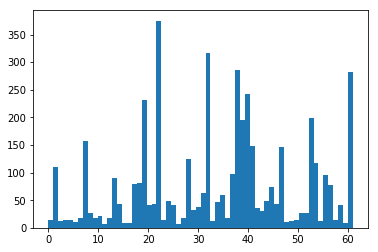

In [18]:
import matplotlib.pyplot as plt
plt.hist(labels, 62)
plt.show()

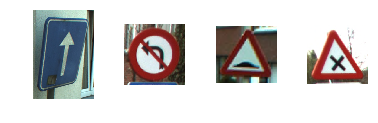

In [6]:
import matplotlib.pyplot as plt 

traffic_signs = [500, 2250, 3652, 4001]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace = 0.5)
    
plt.show()

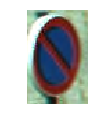

shape: (68, 44, 3), min: 0, max: 255


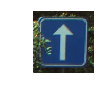

shape: (117, 115, 3), min: 0, max: 255


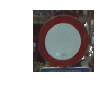

shape: (116, 115, 3), min: 13, max: 255


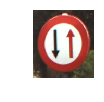

shape: (130, 117, 3), min: 12, max: 255


In [13]:
import matplotlib.pyplot as plt 

traffic_signs = [200, 450 , 900, 3922]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

In [11]:
print(len(labels))

4575


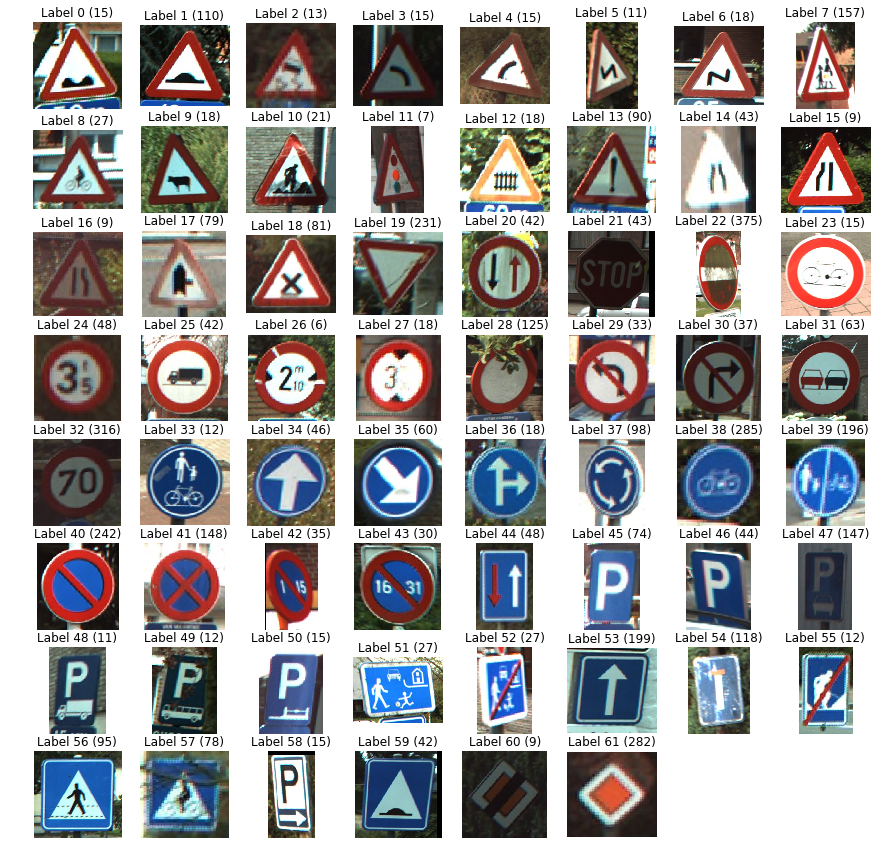

In [19]:
import matplotlib.pyplot as plt 

unique_labels = set(labels)

plt.figure(figsize=(15,15))

# set counter to 1
i = 1

for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)

plt.show()
    

# Feature Extraction 

In [22]:
images32 = [transform.resize(image, (28, 28)) for image in images ]
images32 = np.array(image32)

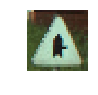

shape: (28, 28, 3), min: 0.0460884353741, max: 0.90637254902


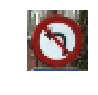

shape: (28, 28, 3), min: 0.0627450980392, max: 1.0


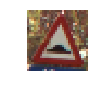

shape: (28, 28, 3), min: 0.0529261704682, max: 0.998705732293


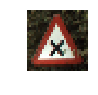

shape: (28, 28, 3), min: 0.00952380952381, max: 1.0


In [23]:
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))

# Image conversion to gray scale

In [24]:
images32 = rgb2gray(np.array(images32))

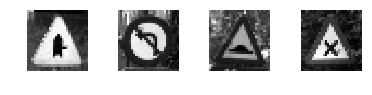

(4575, 28, 28)


In [31]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)

plt.show()

print(images32.shape)

# Deep Learning with Tensorflow 

In [32]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>)


In [33]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH EPOCH
('

In [34]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[61, 61, 47, 54, 19, 19, 38, 31, 32, 1]
[61 61 47 54 19 19 38 32 32  1]


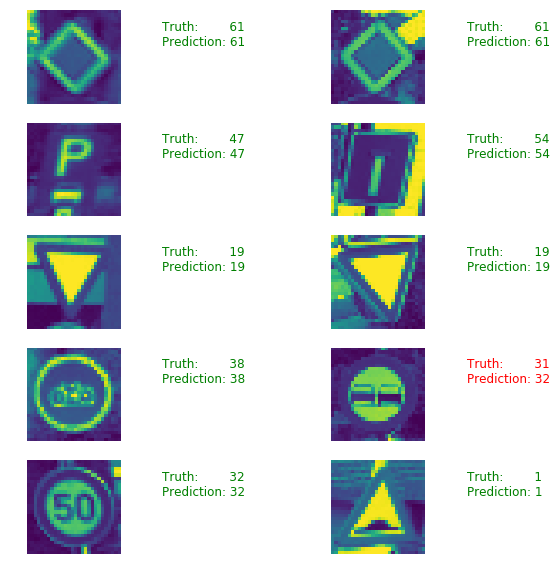

In [35]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAi0AAAJCCAYAAAAMS/f9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzsvXeYZVWV9//dN1SurqrOOTc0GRRUFBQTDooBM6+C+BOd0WcwjL6+8446l+Oo6DhgHEXlVdTBhBkFxjCCAgYEm0xDd9M5d3XldMP+/XFvnbXW7rqX6nTp0/39PI+P+9Re55x9Ln3W3XdF570HIYQQQsiRTuqpXgAhhBBCyGTgpoUQQgghiYCbFkIIIYQkAm5aCCGEEJIIuGkhhBBCSCLgpoUQQgghiYCbFkIIIYQkAm5aCCGEEJIIuGkhhBBCSCLI1PNmA1sXxeV37x9Lm7n3rX59PE59fXo87rxjg5HzhWI8di1NMpEK9l9Kzo+MBnMFdZ5TY7sm39+PiXDNzfYPGfUx+pISrL4ndA1ZOUU/BwDf3CAHJTMFNzomB1m5rxsaMXL5uV3x+Dd3fNiBEHJQnP/Mj8b6y9/9gJlLd8n75poa47HWVwDg2lvlYFi9s40NRi4/R6738utuM3OXdjwaj38xOD8ev6l9T9W195aG43FHqrmq3K1Dsvb/2nm2mXtu12Px+OlN6+Px8qx9xlrX1+S9nPemJ843c19ZdFM8njZvC/UXiaGlhRBCCCGJgJsWQgghhCSCurqH/jgqZsMvbH6RmduxRlxCs5XLxk9pM3Kub0AOtEuoFPhRdCPIVGBdVC4cPyiuo7B5pEuLu8i1yNpda4u9nlPXL6p1aDcUAKjr6fW5sbyVy4icT1uXValN1uGz8vxpZ58xPRC4xAghB0V6q7hf/IwZdlLrrLx6nzunGDGjYcbE1esC93Zmj+i5b3zhpWbul3efE4+3vLAjHo+89cdG7r7BBfH4rq+cGY9bXrvdyO26a0487npU9Fdm1OrUbzasjMfXTpPn7TvHuqY/cMav4vGzW9aauTf+9fJ4vHzG7nj88xW3GrndRTbyJRNDSwshhBBCEgE3LYQQQghJBNy0EEIIISQR1DWmJa08uo/vnm7mOh6V2I2WncpHWitWJZzTFFVqdCZ4TO0/VjEjqQabdujV9YtLZsfjsc5GI5cZlNiV1KiM090DRs7lZc6kYY9Yn7DTcTFNdk1IqXunxa9carLPmOq31ySEHCRab3ire0oLJC4ktWFHPHZByjO0DiiJLvOhDlDlDGb/3qYy56dKTN38m7vj8Q9+b9OGe5eLXMc2iZ/J/ouNyZu+UNY40iXPODjX6pT0sKw3Oyh/n/ELqw+/84OXxePPPMPG5H394v+Mx89pqv6beXq6teocObahpYUQQgghiYCbFkIIIYQkgrq6h05skAqzxaLdL/UvFtNj+xZZVuOaMSPnq6UKB6nBhsCN5FslbTi/XMy6/YusmdOrNOLm3WLWzQxbk+/IdHHhZAeVu2nUpjy7XmVTVdUw/Zh9RnNOJniuYZUmqa8fyhFCDinmPe3qMHPpbeKm6X/OkqrXaF3XF49T6p0ttVt3SKlZKmZvP7vdzM28ZygeFzqlmrYL0oSHp4uO3fFcGTfssmnYc+4SPVJsVGUUhu31SlnRh2PqEg29Rgxb3yCf05rzrjdzeom7i6IPO1K2KvjuolTwnQdCBFpayDGDi9xyFzkWgCCEJBLqsDpbWgiphoucjlpuATAKYNyk9fc+5284gGtuBvBmn/O3HfwK64+L3HIAnwdwLsqfx1d9zv9LZe49AC4FcAqAb/mcv7zqhQghhx3qsH05HDqsrpuWNicmz1evuM/M3TNtYTzes1oqObbMtGbY1OZd6kBH8webT+0uCqrFjiyeGo+3P0tcQqMrh43cWUukWeNf1y+KxzNvsm6kpm6VMaRcRz5b3WVT0u6hvHUPpXUWU5h9oBotGvfYoF27zp5KAj7n49LHLnLrAVzuc/431eRd5DI+5wvV5pOOi1wjgF8D+CyA16JcTHW5EtkC4KMAXgZaTOtDrXdK6aK2P6yJx37BbCPmRuSdLXVKtW83ZCtY63e7a7XVN9rtXFI6Zu+HrA4Y2CtrmjFVvk+nrxg0cmshuk27igaC7KFUQXRsRrmO3vWRHxq5S6dIpdttBZtBOScjz9yivg+yLl1VLilQh1kOlw6jpYUkAhe5jwFYgXLf6wsBXOEi9yIAa3zOX1mReRGA63zOL3aR+y6AuQBucZErAvhXAD+vyF0K4BMAGgFc7XP+k/V+nknwNgDrfc5/Tv0tbi3sc/6HAOAidzaA6SCEHNFQhwE4BDqMv9BIkrgIwHcAdAD4fi1Bn/MXA9gK4AKf820+569R089Gecf/EgCRi9wKAHCRe56L3O59r/aU8CwAG13k/ttFbreL3P+4yJ30VC+KEHJQUIcdJLS0kCRxh8/5myrjYRe5msI1uNLn/AiAe13kHgJwGoDHfc7fjiPHajEfwDko/yK7DcD7AfzMRe4En/P5WicSQo5YqMMOUofVtyKuii35xKz7zdy/qPFP5kl8S9fjtiJsulpn5ybr94XyCY8cb/3K254tsv5kScM+a94WI7eoRdIYn36axLfcs3iRkVvz9eNlGb3im80O2I+3ZZfKDdQVNVM10pWDeBx97JvVMwcpz26kehp1gtl0KC7ic163uR0CcCQ60IcB3O5z/lcA4CL3KQAfBnAcgIeeyoUdq7gmScv12UB1qtizR/5tOaqx8qsyTvUNVZXz6n1u2GvjXYoqHRpXyo/q45v7jdwfeyT1uikjoRNNaft9ccI56+LxQ9ml8XjxTbZK79o3iC6+/1Vi8W9UsSkAsLMo59WKTRlS31stsHp+s4qFWYijCuqwg9RhdA+RJBGm+g2iHKU/zuxgPsmpgffDrj/Jz0IIKUMddpDQPUSSzCoA/+gidxWAJgDvDuZ3AFiKsmkyaXwbwHtc5F4A4HYA/4RytP1qoJx5gPL7mwaQdpFrApD3OZ+stDFCjm2ow/ZTh9V10/LW9dLQa02Pdbt9+URJYR99hSzrvt+fbi+i3UPaVdJvU+tGT10cj7c/w7qOiieK7KlztsXjB3fMMXJ/y8+Px5efdGc8fvWMe4zc198kFXa7vyXGzPSI3Vjm50mqdXqHpG77MWuude1i6fON1vRqXGJ6HLiHfFszjgGuB/BCABsAPAHgm7Av/ScAfM5F7hoAVwL4Ra2LucidB+CnPuc7D8Na9wuf8w+7yL0FwHUo+6jvAfAqlSJ5JYAPqVMuA/ARAB+r4zKPKfyoqkbdZ+eKs7vi8bIbVQPVMVuNO6WqYvu06DLTJBVAYYZUwe1bYqvFtr9V3Njt2eqNUUt9ojt2PSa6beHfPWzksin5jjjlWZKu/WjvCiP3jDMejccbVPrzyqx1Yc9UzQ43hynPaTEqtARuJc2s9DGhvwDqsP3WYbS0kCMOn/OLJ/jbhyf42zDK+f+aa9T8jwH8OJg3Gtbn/DlqfBuAp/xlH8fn/I0Abqwy92GU/cOEkCMM6rAyh0OHMaaFEEIIIYmgrpaWPz0ukekubc2hl626LB43ZcW8mp1lo8ob/ibmVdchXbtGT1ts5HY+XVW6PcVG6T9r4cZ4/MiemfF4aJsNwG5bKy6Xr2wU19YbX3yHkXvdHHEX/eQyea6d19s1ZYbl487OmhGPSxs3GznjLppiG6mhpFxOugpwUDnXhZV0CSEHR4dy2wbZQ6khcR01quaJpT6b0eN1BtI8pQMy9vdj90pxj5zy9gfNXH9edFtTWnTlnY/arKXl3xc90rtYdNk9t55o5E57ibh92rKSqbTgBRuN3KrfSpbk3a+XNXWk1hm5zpR8NvOD7KG8CleolT20QzVMPMqyh8hBQksLIYQQQhIBNy2EEEIISQQMxCXHBC5yi1GOzs/6nC+4yN0C4Hs+57+5n9dZCOBhAB1MLyaE1AvqsDJ13bScvERS9a5b+iMz169iNc7/0Qfi8bJNQUpfo/hzxxZL2vSOM21a88hpEsfy+hPuNXObRyS4unuLjFs227Thpm5Z09w/SOreT7rPNXKvfePtMp4t8S2rrthl5G7/+jPi8ZxN4sPNLLEVdv1eVTk3SIU0qc158We7IG16n+7QCaDSGXUWyu3cBwHcDOAKn/MDtc47EHzOX7Afa4q7tfqc34g6Vp+stG9/L4CZADYCeKXP+cdc5OYA+AqAMwHMAbDE5/z6eq3rWMQNq8q0wfvldZd1ncrcZNOVnZrTBRE2vXiKkTvtwkficdHblOIOleb8h9tOiceLb7MNg3edKnExThcP32PE8Je/SWrzhc8SXdnYZp9x+JmSovyJn7wmHv/inMeN3A1Lb4nHG/dJeZY1daVkvPy2y4xcw8OSGv3oR5EYqMMmvP8h1WF0D5EjjZdXWrw/DcBZmCAlzkXOucgd9f92XeQuR7lT6stQVjIXAhiv214CcCuA10x8NiHkKYI6rMLh0GF0D5EjEp/zWyrmz5MBwEXuNgB3AjgPZWVwiovcLpRrGrwU5RfgGwByPueLLnJpAJ9CuWBRH4Cr9fUr1/svn/PXVY7fjnLFxvko9wd5M4D3oZy8cFOlNfxHAfwA1kQ7F8C1KDcG6wbwKZ/zX6tc80oAJwIYQbm760YAb/E5/9cne/6KQssBuMzn/Hg1sLXq89kB4EuVqpKEkCMM6rDDo8PqqvDW7p4Wj//BvcrMvWzGA/F42vFiv9zxjBlGbpaXyo67ThPz4tBJ1o20cs7OeLyqZ76Ze+RROW7eLB9B61ZbwTadl+OBRWKuXPAbm8b4QzwvHj//1eIeOmfKY0au+81yjfuyJ8fjub/pNnJoE5OyGw4aHyqztKmiGbqRwoZuCcNFbgHKL7IurHQJgAtQLgPtUC5atAPlFu2tKFeL3ISyyfHtKO/qz0DZTGv9kfZer0O5OuOrAPwVwDKUy0lf4iJ3LpRpteJX1nwX5eZfcwGsBPBrF7l1Pud/W5l/BYBXA3grypUev4hyy3a4yH0JAHzOv2uCZc2v/O9kF7nrARQAfAtA5HO+NIE8Ocz4Nnl/h5Z1mbmWtXtFbpvoHjel3cj5Fnm3179SXNOnnf+okcuoKrVTMrZh4m9ueVo8nvGA/FPYc6KtMOu0d0d5mFzwr2f63fKD/6bWU+PxeSdY/fXMGevj8f+cLPda9Webav3VqXJ8aYd9Lp3K/NyfvT8etz1hXfP5I7H9335CHXZ4dFiyv9nI0chPXeQKAHoB/BLlMtbjXO9z/iEAcJGbhfLL31mpKjnoIvcZAO9A+YV/PYDP+pzfVJG/CuVfOBNxOYB/9zl/d+V4TRU5Q0UpnQPgwkqb+FUuctehrJjGX/g7fM7fXJH/Nsq+XQBVX/RxxnfW5wM4BeUql78CsBnA1yazPkLIUwJ1WJnDosO4aSFHGq8a/0UwAbqt+yIAWQDbXBT/jEwpmbmB/IYa91wAZbbcD+YC6PY5r01vG1AOLBsnbCHf5CKXUf03qjH+k/Tffc73AOhxkfsKyr/cuGkh5MiFOqzMYdFh3LSQJGESLgCMAphe5eXZhvKLPE6twpqbUDanPtk9Q7YCmOoi165e+oUodzI9WFYDGHuS+xNCkgV12EFS103L0C4pSX//OusH/Vv7knhs4kx67PNuP1uu0b9S0nwXz7F5fL2j4jveus52lG6pEseSHbb3cioNu9AkTuG+pba0/pw/qRTEkafLfS+yaYznT5fuqoXXiQ/3kcIJRm7qI+LDzgza8tbpvaolQVE5rZ1Ni/SN9ryjDZ/z21zkfgXgahe5jwAYALAEwHyf87ejHGz2bhe5X6DsD/7nGpe7DsA1LnJ3ALgX4g/eAGkNP9EaNrnI3QXgKhe5DwA4DuVI+TcfgucbcpH7PoAPusj9DUAHyj7uT4/LVFq5j/9DanSRa6qYeMlhwPWprFVvY1qQUu+fiicrzrC96x67XII1Tj1Zfhg3pOx3VlYFntx79Rlmrl01QB6apWJBrApAekz0l0/LZCnQ+mMdMtf+oJSOuG3U6qUXnfFQPH7BPElz/nHv6UbuP3/4snh8470vMXMDc2S9GfUV7Gx2NdI2jOeohDrswHTYUZ9yRY5qLgXQgHKhpL0Afohyvj9QNj/+N4D7UH6Jw06pMZVOpB8H8B0A/QB+CmBqZfoqAB92keupvNQhFwNYjPIvlp+gHPn/68ks3kXuWhe5a2uI/CPKimwrgD9W1vd1NT9cmQeARyHmWEJIMqAO208d5ryvn/V50Vc/Hd8s3W+jxYvtstU2lpYtdn2jU+VXgbG0LN5p5MaKcv1JW1qGJmdpSQV13Fp2SobPrtPFwrPsIlt0SVtafr/3uHj8yHdrWVrszbSlxY2onyMlu3adpXDrI1cFv8EIIfvLBfOuiF+ywdMXmLmW9T1ysFOsvqWFc4yctbSsj8dTGqyu1paWRz57spnLN8vrXGiVcdHW10RmaHKWFp1NVFIJSP0rrPVHW1o6s6KHfvywtbRk14opaOa99hra0jKgLC3NO6yKKqqafA9f9T7qLxJTV/eQ3oyMrrQvafu98g89rYxDg/Psv9fhRfIlvnypxAf1DDcbud2bxSzbusE+Zst2eZkzozJ2RfvFX8rIvdMq89gH9qmhmeKK6Vot61v3wxVG7tbXyInPnSYbmpHX2/Wt/464zlp22bm2vGzu0qoKp2+y7iDfZNMfCSEHR0m5erJD9su42KH0V0rKNKz+e+tKPuNE6YicScluoRQolfu/elI8dsFmJN8uekkXyw1/THntMlaqLVUjfDIzKILT7rE/LG+bIvrsBctXx+OXrbRdqH9Rkiq9qb/Ya2gXVvt6GYcbqZadzOonE0P3ECGEEEISATcthBBCCEkEdXUPjXWKyc+XrNtnYKl2e8heqjDD2jznzZXqsdoltGeDjeZv3SRmyZYd1u0TZgnFa0rbNaWUu6ik5sKKktpEOzJV7tu5xq594/ckgPtPbxIb7dM6Nxm5wsVyje1fX2LmRqfLMzcq868r2EWVGgKzLCHkoOg+XXRMZti+b8275F1f+1qpnDt7kW2aqt1AWwekWm72M1ONXFG/9kFEh8m0UT87U/kgri2ldZaKbwkyDfU1Sg3qnBF7vYYH5LnuaBRd9qx5tnzIOSukrtmdLzrRzC37obi0MzukMawbGDJyfogx5WRiaGkhhBBCSCLgpoUQQgghiYCbFkIIIYQkgrrGtMw9ZUc8zpfsfmn7kHSALsyU/OJ5c/YaOV1/pfsx8QM377LXa94p/tiGAet/1jEpOtNQpziXJ/VJMiwGn5pqyGrSDoenWcGu1fJcj3/n+HjcdImNfTl5ytZ43H1xi5kbvX6mLEkVZtgnHqfA6u+EHEry6lUMU3KzPVKnIavKMrRk7bs9WJDSBKVvyLvcP9++v069vuGbbEozqIA6Fwg6pQNMRnVY9USd51Q6dClrBZt3ieDYnR3x+K/PtTVrTpohpShOedoTZm7TIxILM3OVlH0ojQX52imWZiETQ0sLIYQQQhIBNy2EEEIISQR1dQ9t2iIuIDdsU3JbtsjxkCrvPL150MplVMn8TjFRdvzZPoptFmbX4atYHsOKuLoJoZ7LBBUldWphSd1LrwEAis2yR+zYIObQO+6xZfxfeJZUmFzRaVMm/zZzdjxu3aZSyAv2oQotTHkm5FCi3S+9i62+adwl799In7htR9qtXENafMl7TpVzFvzadgjce7xcI3T7WLd1FRfQ/uAmHrvAxZxvk8k5d/TH43Vn2pK9I8p/PlywlbkHlCdphnIJ+fyYkUs1NYGQiaClhRBCCCGJgJsWQgghhCSCurqHMCJ7pJZN1n0x+08SfT/2sCzrvqyNTH/XM38Xj08+U7Jsrt/5AiM368/KnRNUr8y3yr11ls0+biRdbVK5hPapiKvktCm3scf6kcamyA36FqubtY8YuT2jkqbwxN5pZk5XvUz3iUnVleyiio22URsh5OBo3iPvWL7Z/t5LDYurY86vpdJt3xusm2N6m7i7Fz5rczzePGb13LzbRSd0rww6Jqpb6+q2rhS6t5WcrugduH10tW/t0tbuIACY+3txCa19n+ivpy/aaOSGVIbUWMkq1WXfk4rmhbPELZ55fKuRwwxb4ZyQcWhpIYQQQkgi4KaFEEIIIYmAmxZCCCGEJIK6xrS0r5XbZYasX3VwjvhBOx+W7p+Lftxm5L7afG48/l8n3R2Pn3Peg0buztLJ8XjmPXYdmSHxTRebqleUrFZTNnDTmnTorKq+q2NYAKBvkRwPnCgpjgtm26q/q3dJpczS/R1mbvY6iWNJ9avOqGl7r7DjKyHk4Gh/vC8eD8+zegl5iV/r+pPEZ/jUXCPWd7HITW2RTsbTzt5u5HYMS2mDWX8JYt5OVnEyOpQtLOituzkrOd3JGbBdo3U5CB3DAgDdV8o6zpkm6907aqt294xIJ/rCN2aZucYWienRnejzx88zcuxST6pBSwshhBBCEgE3LYQQQghJBHV1D019RNICQ9eJptAp5s/m3z5g5uYXT4nH37n0rHj8suOte+jkc9bE4wdTy83crD+LrdSYRmu4fbTZNEx5NinVSq53mb3g4PHiEpqrGkHu6rOmZnefpEzOvttWimx5fLccqIqSpc52EEIOI0ofNG8ZsHMZ9a4rV9HUu2wq7/Y2cYMMvVoayHY1DRu54vNlboe3LpaZ94ge6VmhGjBmqjdN1XOh67io3EXzb9kWj/u/bK+3tE3c9rtGRGcN5huMXOv7VSPXrHUxlZom/srx2SCFPF+aUI4QWloIIYQQkgi4aSGEEEJIIqire2hoptxuygbbIMw0+NPeliW2UmTLQ2K+XPJFqRZ70ztPMXJPXyJVGp//glVm7rbC6fF49p/EP1RMBeH3qYkbJjb0F41YKStye1dIg7DBxbYi7qxZyry6V9w5Dats9dpZd8tn07R6m5nz/cosPVOev9huq2YecPM0QsiE6Hcsu3mPnfTK5ZKWl88P2cyf2bdsisfrZktn2Ow51o3U0agqhD93t5kbfUKqxbZtFV0UNnEsNCuXkFJFGeuJQvtmmTzjx2vj8fohW427VKXTbPO7rBu8OE25rLJ2zhVFuWcGxPWd3m4zKH2TdTkRMg6/2gghhBCSCLhpIYQQQkgi4KaFEEIIIYmgrjEtJQn3QM9yG4PRvlHSd9NDKs03FeyrlL848/D6eLzi8wuN2N3vXBKPLzjFpkMvPFu6q25IzY/Hi262zt6RmbLGhl7x+4aphb1L5MH6l4qPuX22Tffb2y+VIxvukziWmX+zac06jqW42/rO0zOmyzpaVGph2q6p0MqKkoQcSrLbJO7Cj9l31unqs0U17ggq56qYjiXfk7TmTSO2cu7sl0jsy7wpfWZu+1slfib1XYk7ad9sY+0GZ4muTKsQwrbNdu2nfuq+eLxxWOJlCkFg3EM7pUrvwn+SyrbDx9vYF31a084glVulPI/Mksq5TW7ieBlCQmhpIYQQQkgi4KaFEEIIIYmgru4h07Qra6e0OyPbJ8tKDdjUaJNamFVpcatWG7GlN0gK9C2vO9XMnXvao3KJs8WkusYtMnKLbpa0w1KD7O96ltl0vL7l8mAdiyStuWe3NQ23PSrnTX9A3GHNq3cYudKe7nicarPp0L5VTKq+MfgQFelRNkwk5HDhmoISAzq1OSydoMjP6YzH2XXSdHD+r+z11kwXt/Xxz1hv5pZ3Sgr0A68RHdDxX7Yq9pSN4tLuWSZy2h0EAIMFufdIUeT+us7qw5X/KFXG/YI58bih26Z1awptVlc6pb8zg6J7U0PWZVXoaAIhE0FLCyGEEEISATcthBBCCEkEdXUPmYaEgQU1r6o3NilXzD6m1pJyexTE/JlqtubE7O1iAl0xfJKZu+vVJ8bj058pJs8lz9hk5NY0iom2cY+saWS2jdJvnitVant7JUOo/SFrGtUNI5vXiInX99rsANcsLiDX0mLmSk1ivtWR+Np9Bezb/JEQcnD47h45aAzcQyMTu0hSWevCzawWHVNYIfolvdtmGi77vui9h1ttZuSpJ6+Px2fMlkzIO15pG8OiV+790mfdE4+1O6h8LHrqr6vkGis/8piR80vmYSJGZ1jdOzxV9FJ22DY+bNmm3P1ONaTNWP2VHsqDkImgpYUQQgghiYCbFkIIIYQkAm5aCCGEEJII6hrTolyYKAUVXEsZPXcAe6msfZSUigVx9wbp0G5lPF4F8eE+/9wHjFzrmeJ/Xd8zNR5nSnZ9g/3i0219UMY6hgUAWtaLT9wNSqVInwn+M6QlICVMaza+3xofkytWnyOE7D+6Cq5L26CxVKuKPdPVXb0tPeAaJH4k3T2IaqT6JUZm6Q9tDMp9WYlxOWHFlnh85tINRq49I/pr85CkWmdSVjk8/uPj5Ho/U92muzqMXH6K6LZCizx/Pqi+nc7LMw/OtHOj7RKv1/GErM+NBDEsGQblkYmhpYUQQgghiYCbFkIIIYQkgvpWxNXFbAes2TQ7JKlx6RFJZUa+gKo0VK8Ii5SYF13gOkrfIxVxj9staYe/87Zy7tQTJS25q0XcORt22AZhzQ+KyXP6/SqteWOvkXMjquqjqqjpQveQSuX2YcPI0sRjVwzM0M6mGhJCDh2u1ZYi0I1c/YBy+6Ssm8O1iIvF6Sq6gUvcN4obqWGrLYmw6CfS1PCxS2bG4+Pm7DRyQyqVOV+Udey6camRm/6YuGn6TpsVj9sf6zFyuinr0CzRvaVAfTX2iu5p6A/0/PDEer7UZl1grkD9RSaGlhZCCCGEJAJuWgghhBCSCLhpIYQQQkgieMpiWhr7rM9Sd/xM9+lUONv9E8WJc3n3iQspqetnAn+pKpPv9+yNx8d/3pbi3nbhgni8dZb4c9t32VtNe1jOa1y/RyZGbIdq3aHZrCdIizTrzYbp0NU7yGpKjdyPEnIoKalS/S5vU3RdUd63koppSc+dbS9SLUbPuerHQSuT5q3SNmT+DdJJfu3ZtitzdkDOm/uHoXg8LWX13PZnil7qXCv6tdhq25BkekWfjXRJbI4PVFSTqFR0PWjjcUrNIuzVc/mmoN1BzzAImQh+sxFCCCEkEXDTQgghhJBEUFf3UEpZRguN1uSZUHUHAAAgAElEQVSZHlbH2gVSsOZUP6rcRcol5McCc61OIQxMudCdV6dKpUgE15j947VyPVXJMjTXepW66EeVa6u9zci5onJZFZSbqxSk96l0x1KD/U9UalTPnKnuKirVmCOE7D/pLkk13scdrdw5KfXe+7C69x7VzVm5fgvHLTBipSZJUQ6rh+enyHktW8WNsuwGm6LshkUX5efI2nuOD9zUaolej7M2XVs/S0EXAA6828NTRW6kc4qZm/qQuLa0qyi7xa5d60BCNLS0EEIIISQRcNNCCCGEkERQV/eQNikWA/dQow4yV9k0fh/3kHK/KDdN6IrxuuFWWFW2SmS+V9UqAQAq20e7pVyQAeDa5MH8DDHDFlusibPYKm4pHYmf2mMj7HWGQWrM3qvUJP/JXF6XxLWfJxsmEnJoMbpoMGh22Kgy/pzom1BX9L3whHicKoiea9plM3pMFdzAfdyk3nWn3Mw+dFsrHZjZJdeb0TNk5ZQbqKCaIubbbUbPrtPkeKxT1p4ZtPftVwV3G3rtXM9K0dNT1qkMoX77eRpXOiEKWloIIYQQkgi4aSGEEEJIIuCmhRBCCCGJoK4xLcUm7Yu1czpF1zeK79QFKXOpJhV3omNfwo7POsYjqKJb1V8aVqadLMrnrNMM08O2Im6qT6Urt4gPfHTZTCNXaFHxOMGSGnoltiY9Ks9Vytj9Z6GF+1FCDiWuRaUKB+URCsvmxOOhuaKjGrutomt/UMppm2rfYWq01l+hXlJzOg3ZlSapv4Iq406F0zT0SbxLQxALuPAJ0V/DSyR2b/epVveOtKrxdLsmnb7d+aiKx5k11a5xtErlYHLMw282QgghhCQCbloIIYQQkgicP1CXCCGEEEJIHaGlhRBCCCGJgJsWQgghhCQCbloIIYQQkgi4aSGEEEJIIuCmhRBCCCGJgJsWQgghhCQCbloIIYQQkgi4aSGEEEJIIuCmhRBCCCGJgJsWQgghhCQCbloIIYQQkgi4aSGEEEJIIuCmhRBCCCGJgJsWQgghhCQCbloIIYQQkgi4aSGEEEJIIuCmhRBCCCGJgJsWQgghhCSCTD1v9nfT3uHHx75QMHOupVkOikU1UX1f5Rob5KAha+Z8Ws4rTWk2c4ML20ROXb6h167Jp108zrel5XpZZ+RKVT7FzLA3x03deZnrGY3Hqf6hiS8AwI3mzbEfG5O5lFp8JlhEXs67ZesX7YIJIfvN81/8SdFfwRs12iXv3/+Kbo7HZzWvM3LRcy+Kx765MR5P+cZeI7d1oCMet160w94sLbooNbUzHj/6nnlG7OE3fCEeNzrRj0VfwmRI19C9B0q1e9e6V2r249RfJIaWFkIIIYQkgrpaWqCsHy68tba85NU4FWyy9Y48rS0NaSvXpKwwzl6jbW2vTOXFqlPoarHLHRSrRmNG7lVsDqw6WZlLjckvidSItZLoe6X6h+X8nj67dvVc3ltrjbmvskj5fCGYrH4eIWT/2fk0sYzkz+o3c4W8vPffuObCeHz1GdaysHJ4TTwuzRIrybldfzFy1+1+TjxuHrKW2FR7uxwo3VZqKxq5DAKdWKGWVUNbQvLeXi+FiQ0e4fVqWXIOh/WGHFvwXxAhhBBCEgE3LYQQQghJBNy0EEIIISQR1Dempah8nUGsih+T+A+n/LT7xGrozCLlO3VNjVZOxXSk+oarziErH4GOYQEAN6yOVXZS6Cl2A3I9N6bWWwx8u/q+6nkR+ID9qLpGyc45lTlg4l1S3H8ScjiZfr/og+yd9n1LKV2x+XzJVmzeYrWFHx6Jx/kporN+9rYXGLmZSnekTzzOzLlhyTwszJgSj9tX21i7ly1/eTweKchcZ6PVh1sH5BrTWwbj8QlTthu52Y0SCzg32xOPF2d3GbmpKXnGHcU2M3d2k8qaVL+Zs27i+BtCQvhNRwghhJBEwE0LIYQQQhLBU5byrM2kgHXvaFeRcQcBprCSa22Nx6UpNl251CTmUBdm/5YmTsnTBekAwLdI2rRTrphQTuMa1PpC91BJy6n1tdridyn9/IF7zA+Jaddpt1I6MK+GbjVCyEHRvFHcI8X2JjOXUkUgZ6wSV1HfYuuycXNnxeNCiyoS96GdRm7nTxfE4/4lrWZOZx6XGpWLvNXq1LXbZ8TjpmZZU++wXXtJVcrb0N0Vjx/fNtPIFYbl6yKzWz1XkAnd0CN/aN5hlW+xSeauet//i8d/1zIKQiYDLS3kmMFFbrmL9tnCEkJIIqAOq7elhZAquMgNqMMWAKMAxs1sf+9z/oYDuOZmAG/2OX/bwa/wqcNF7nYAz/W58k9iF7mlAO4PxFoBvNfn/OfqvT5CCHVYiIvc5QC+AkBHfl/gc/4PgdwLAPwWQORz/sonu259Ny06Q6ihwUz5kdEJ53yYPaPdSC3WzKkx1WiDzJp8l5zXs0yuV2ywds50Xm1odeJT4LFKKbnskIybum02UmaPcu1ot1dQzde4n4KeSqbfknKx+bytvruPu+gIx+d8nGbgIrcewOU+539TTd5FLuNz/qj3gbnIvQWBAd7n/DoA+vNaDmA1gB/Xd3XHFntPnxaPe5dZnbL4Jyp76AXyzi7/tu0p5EZEbsvF8s4ed4V1Ec8d2ybnFAKF46q04gn+bvSIzjQM5LQb25yTDfqeKT3qG5V+Ca5XbJXn7z7e6uih58r3+ntveFs8fujyLxq5JFbOpQ6bkD/4nD+v2qSLXAOAzwL4SzWZEFpaSCJwkfsYgBUobx8vBHCFi9yLAKwZ351Xjq/zOb/YRe67AOYCuMVFrgjgXwH8vCJ3KYBPAGgEcLXP+U/W+3kmg4tcF4APAbgMwJ01RN8C4H98zm+qx7oIIfvPsajDJsEHAfwCwMLJnpC87Sw5lrkIwHcAdAD4fi1Bn/MXA9iKsjmyzef8NWr62QCWA3gJgMhFbgUAuMg9z0Vu92FZ+YHxSQBfALCzmoCLnANwCYBv1mtRhJAD5ljTYWe6yO12kVvtIvchF0lBHhe5JSjrro/vzwVpaSFJ4g6f8zdVxsMuOuCO9Vf6nB8BcK+L3EMATgPwuM/52wFMPwTrPGhc5J4J4CwA7wKwpIboeQCmgq4hQpLAMaPDAPwOwMkANlb+/wcAxgB8ujL/BQD/4nN+cH8+h7puWrzu5DwWVJ/VcSxaLuxWnKmy5CC7WKcolxptfMfGF0scy/kvvjceH99iK0DmvZzXXZC0w+68TUHsGRN/9IO7ZsfjPX/tMnJz75T/MA07pfLkPinYhRrxLmqsq+OGn6f5DI8eDon7w+e8/g89BBUfciTgIpcC8CUAV/icLz7JC/0WADf6nB+qJUQOnrbNEnfXvMsaqftWSsfmzLD893LbbbVYtKt/aioJxA0GVbv1ux1Wu67Swd2nJqn4a8W+6LngPk6VUdBjBCUg3IjMTX0kuPfLJQ5vbEA+i70l+/wdKYmFCWqdJ51jQocBgM/5terw/op77AoAn3aRuwhAg8/5H+3vdWlpIUki1NaDKEfpjzM7mE9qauBUAKcD+FFlw5IGABe57QBe7XP+rspxK4DXAHjZU7ROQsj+cazosInwkKSCFwJ4ZkWnAWV3WdFF7lSf86+udRHGtJAkswrAy1zkulzk5gB4dzC/A8DS+i/roNkDYB7KG5fTAYw3kTkdwF+V3GtQjncxKYSEkMRwtOowuMhd4CI3szI+EeWkgp9Vpv8vgOMhOu6XAK4FcPmTXffIsbQ0ihEwpdJ8TXVcAE6n3WlTZmhBVVmihVabNuwXiyny+R1iv9yUn2rkbnjizHg8MCTmShfU9lk6Y088vmiJlM+4vWWFkeveMycez9buoRD9XEG6ozHLahdQmMbYaFPKj1KuR3nHvgHAEygHo+qX/hMAPucidw2AK1GOUq+Ki9x5AH7qc76zltzhxue8BxCbf13k2ip/3x6IvgXAtyry5DBTbBQlkx61Lt18q8w1qCxnPxq4beerKt7dyvFRLY15IqrIupL9Z+DTWj/W+H2qr1drHZN0P2nXfP8i69zp3ipfOSe97Il43JWyKd9JTHk+QK7HUajDKpwP4JsVi/B2AN8G8CkA8DnfD6B/XNBFbgTAgM/57ie7qPN11HcvaXuLCjQJ6q+0t8u41qZFxXj4dlEAvsluTDT5qbbE/4Z3yL0/eabEL4ablm+ve0Y8nuym5aypG+Lx7TvspqXvJ2rT8nv13yaMadHl/2v4laFq29SKYbl157UHHO1FCClz3vmfjF/GcNPSt0T0w0iXvG5zv/6AvcgyKc+/+nLReSf8xzYrdwi6tleNVamF+SF4YDEy+rj7DBvXt+Nc+RF20vGb4/HPVvzSyOlNS2r249RfJOaY2c4SQgghJNnU1T3kGqpbQ+AnbmLoguwZaLeH3uGHp2dkPzbWaR9z5tSJ09ivfehcc9z1E7HkzOlRbppgq7f2WYvi8fILJFvg+M4dRu7OKXMnvO8+v1TULyQ3GlS61e4i3TwyW+OzJYQcNJlheffGOu371r5JrJ5Ds5VVNsh2HFgkSR7ta5TVONBz+zRbrUYtC0o1K3oNfXMo0G77vSfYe3XeL5/b1y64UZbgjrjkF3KEQksLIYQQQhIBNy2EEEIISQRHTvYQIYcRF7nFKEfnZ33OF1zkbgHwPZ/z+1X+3kVuIYCHAXT4nC8+mTwhhBwKqMPK1Lciru4mqjJfACDVpjKBRtVc0K1Ypzyb2I/Af6u7Q4902mssbuuNx/0l8T8Xn7B+1eZdkq6o/dn5duvPznfIvVY0S5uYP+xdbuSa9sgadTqiy4flfJ2SC6pN6uyprPrPF6Y8D40gaVQ6o85CuZ37IICbUa4KO1DrvAPB5/wF+7GmuFurz/mNqHP1SRe55wG4DcDHfc5/uPK3awG8WYllAYz5nG/f9wrkUNC7VNJyp/3RZp8PL5MO0O0b5H12LTaVt2+hvLNtW9V7XyMDp2psCmAyD0ud9p+lji0x+rEQZG7qOXW9MJ7ON6l4Qn1OmOGoOti3nGy7XLfcJ5m4D4xJZlF3qc/ItafkGouRHKjDJrz3+OcBAHf5nD9/Arn/AfB8VDZkta5J9xA50nh5pcX701DuvfPhUMBFzlVK3R/1uMhlAXwOwJ/1333O/0OliVpb5fP6LoAbJ7oGIaSuUIdZXq501UQbljdhPwwodA+RIxKf81sq5s+TAcBF7jYAd6LcIPBpAE5xkdsF4BoAL0U5f+wbAHKVfj1plAsZXQagD8DV+vqV6/2Xz/nrKsdvB/BPAOaj3B/kzQDeh3LL9JsqreE/inLTL22inYtyJcdzAHQD+JTP+a9VrnklgBMBjKDc3XUjgLf4nNdVbZ+M9wP4FYCZ1QRUOf8L9+O6hJDDCHXYk+Mi1wEgB+BSAH+czDn1TXnWJs+svbVrksqJflD1fksFlqJmcef4rHL7hE3AVMrzaKedO32KFDVqT4kb5ZSz1xi5x4+bEY+LRbnerA5r8nz33PtETlXivfthW315+eNyL6dNtKXQ/KsaqQXF9bRbzY1W36iH7rek4SK3AOUXWXcvvgTABQBWo9zD4kaUy1wvB9CKcrXITQC+AuDtKH+Jn4GymbZqYy4XudehXG3yVSiXyV8GIO9z/hIXuXOhTKsVv7LmuwAeAjAXwEoAv3aRW+dz/reV+VcAeDWAtwL4GIAvAnhW5VpfAgCf8++qsq5FAP4/lBXcF6utH+UNyy4Av68hQw6S5j1KFwX6K1WQd7bYqPRNUOahb7m899MfUNVyQxeQLjgZFppTc143WuywjVx9g9KPSseUWuyaUmPiiik1ynNldgcejWqNGkMXvpJ70YLVZu43M8+Ox89uiguiotkdZW0RQR2muKFiVfobgP/tc/4+NfcJAF+GqgD+ZNDSQo40fuoiVwDQi3I/ik+ouet9zj8EAC5ys1B++Tt9zg8DGHSR+wyAd6D8wr8ewGd9zm+qyF+F8i+cibgcwL/7nL+7crymipyhopTOAXBhpU38Khe561BWTOMv/B0+52+uyH8bwHvHz3+SFx0APg/gIz7nBybR6Znl/Ak5MqAOE94E4F6UN2jvAfDfLnIrfc73uMidCeA5lb/Pn8x6AW5ayJHHq8Z/EUyAbuu+COXg023qCz2lZOYG8htQnQUA1taYr8ZcAN2VPhr6Pmeq47CFfJOLXObJgs1c5F4OoN3n/PefRG4BgOeh/KuMEPLUQx1Wwef8nerwKhe5twA410XulwC+BOA9FRfVpBfMTQtJEtqSsAnAKIDpVV6ebSi/yOMsrHHdTSibU5/sniFbAUx1kWtXL/1CAFtqnDNZXgjgzAlat5/ic/6VSu5SlCPy1x2CexJCDi/Hkg6rthYHYArKG6PvVzYs4z7GzS5yr/M5X7VzfV03LaVhielIddTIzNSNuoIy2L5aK4DQMl6U46E5du74JmlOtrJBSu2/Zta9Rq572sRZYSPerulPPRK7cvefj4vHi35rU+Aze5T/WTc+DHzWJo4lTGXW5fpVauE+qeFTju6y2D7nt7nI/QrA1S5yHwEwAGAJgPk+529HOdjs3S5yv0DZH/zPNS53HYBrXOTuQNmUOe4P3oAareF9zm9ykbsL5V8QHwBwHIC3waYiHygfAfBJdfw5lBXMvwVyl6LSOZUcXnSZglKrjcHoWyjpwB3rVTxZoJeysyVer2GninELy/ZPsmGia5WUatdjY1DWvFMs7oVOlYa80eqvxd+Q/W6qU+nlsIWKfha1Xpeyz1iYInGHq/Zaq3/PaaLbsk6uXwq+V1OY/C/vpHK067BKPZgFAO5G2YJ0BYDpKAcj96Js5RlnAYC/AHg6yvF5VaGlhSSZS1H+Yn8YQDuAdZAv8K+h/ALeh3Lk/X8AeMFEF/E5f6OL3DQA3wEwD8B6lH26GwBcBeALLnL/jnIQ2g+D0y9GOfJ+K4C9KEf+/3oyi6/UWoHP+X+YYE1h6/ZhAIO6dbuL3Nko+4KZ6kxIMjlqdVjleb6M8gZqBMAqABf4nN9TmY/dTi5y4zvdHU/qOvd1jN07v/FN8c1CS4u2IPhhZZEILC2YKsWJfHMDquHVL5W1b5xi5j550Q3xWFtaVo3aXwXdhclZWu7plYaJ2tKyILC0NG8Qt6EbVZkDtSwt4X8f3TCxhqVFF9675Ylrjv6fLYQcZs595afjl7F525CZ23OK6DNtaWl8wjZnXfMp0V/LImVpGQ6y/Wo1QiyVJv57oCseOwBLi9eWltDaU8XSElpktKXFf6zbzK1ZNzseP/rSL8mtgpJh2tKSnbOW+ovEPHWWluBL1usvY1VzJ+ySal5L5QIKy+QV22RDU5w1ZuZmZ3ri8R+GpGrt537wSiPXYDOb5VbBPrBll7zAy7aIIkr32qq0ulKkNgf7QDloF5hvDFLDVaq06xfF6cfGAjm+54QcSkY75D1t3G31V1OvvJeNj26Nx749SEMuqSq1Ol05/NFR68ek0hdeu9Ib7Y+4k86Wzcjitj3x+Jd9Z9nrqXIT5kcR7I8uk+at7xusdaxL1rHh8TlmbvEy+ZHYXZSNWlNQZ60lJTqQ/euJ5lipyEcIIYSQhMNNCyGEEEISQX0r4moz5LB1nfjixLEaYcMx4z/VW67AzVtslMmOrsGqa7px69Pj8cx7rN+naZfyOefV+sL+hrrJmK50G5p4tVlXm1pDH7U6L7U3+JxUpdvSiJrLB5VzQQg5lLRvkncvFTQdHG1X77aq6F2aN93IpR5vkYOCSpKoFT8SxrdofZEWPTIyx8bgLW+dOAu+85HgVtUar0423jFY354TxaEz6w77OX34xb+IxzPT8lmkj5k2PORg4b8UQgghhCQCbloIIYQQkgi4aSGEEEJIIqhvyrOKuygG3YvhVVxIg0rdq+XrrVKuAABGu+TRFnXa3OX+ksTJrNswMx4vGbYpfk6lVJtU40KNG+v11fAJ61RmfR8AwNad8bA4EMTjqM9Jp4abFERggs7RhJCDIbNXUpR9o03EHZ4h75+OzxvrtJVzOx9T72VYcVZTq06LRumY3qU25bnkU2qs1rDGxslVu94+a5hkjMvgKXL9zrX2czq7UT7DYaXLGoPEZl2nhb+siYb/HgghhBCSCLhpIYQQQkgiqKt7yBeqtxRINYoZ1aRGp8NSt7pRl0ozTFtTZr5F5qY0DJu5nQUpVZ3dpSov9tmGY244cGHFN/O1j8fZx0Wj3E3qHDc0UkUK+7p9ICZlXS3YhRWG69iegZBjgfxUSdHNDFrdMPvPomNci8h1n2DdQ9MflHddpxrv0zCxFlVcR70r7HEmJW6qrcMd8ve9Vh9OOs1Z6zOll3ywntOXbIrH62cvN3Ml5dNvdKJ7R739PHUzRVbEJRpaWgghhBCSCLhpIYQQQkgiqG9FXJUVlO7qNHO6u6h2l+jmgQCqN+oKKirmW0Vu00CXmftK73PjcddD6hKBiVY3OJx0Ns4+7pwqc8qk6pusCVlfIR00QSsN2u6y8TlB5eDQXUQIOTiy3fLu6U7GAJDd0RePXYvM9Z5kXeKz7wq6Occn1cjUCVw2xq2ksjCblvUZud2jUiF39W7JkpwXNFc199bjSWYk+marowfzos/2nhZ0unfqO0DpbO0OAoCi3w93GTmmoKWFEEIIIYmAmxZCCCGEJAJuWgghhBCSCOob09Isvt6hU+aZOVW8ES0b1ERYOTdVJVYj8PvO/Gt/PC7db2NaMspvm+nrkfXlrf/V3lf5d0Pfbq04Fo2OY8nKc4Q+4dHFEu+Tytt7ZXsl3ielUrKLwTVqVu0lhOw3+p0dnW5jzTI98v75ZplzLTamJTUUxJPEJ9UooxBUBXcF0VNexbzNaLclG8ZKst6+7RIzOM91V7+Xq6HntJyq4j00z8bTbd8l13jPub8ycyVd0EHFrYRdnveUJC17NggRaGkhhBBCSCLgpoUQQgghiaCu7qHiHjFLNt1mU3dT06cpQWX+bLWmR1uVUf/diqWGxHWSHrQm2VKDShnUbpQw7bBapcj0gTUSq3pOsPbGbkmLDCv9alNxsU2lSgcuKjdaw9VFCNlv8h3i3t70iqA8wpBUnF38U3EJ+ZHAtTNapcp2rZTnUqmqbKldp15b91DJi1z7Y0rVFwPdEDalnWgN4Rp1o8ZF9muk7fbWeLzyzG1mLu/l3ml1veGS1dG3Di6Kx5dNvDpyjEJLCyGEEEISATcthBBCCEkEdXUPpadNlYPpU+2kblaoq8CGpssqEexhNVvfIq6T4VktZq7QqpoOKndTejgw+WoLrXLTpEetnMnoGVAVL2u4jZxae6klqAbZJP9ZSpnA7aMvqT1WoTsodCsRQg6KHc8QnXLxGXeYue/f/ux4XGyS97nzvkDFTtaVPMkmhvlOcQ81pHrN3ICqTDv1EXFLuSAryFf76Rq6rLQLWumvgSVWHy74leiipzXaTKVGJ+5+nTGUCn4/X7fh3Hh82XFV1keOSWhpIYQQQkgi4KaFEEIIIYmAmxZCCCGEJIK6xrRg1vR4OLxgil3IoHQkze7sR1XSE++zdLVKAMh3ia+31GDPadlcpVNyWAFS+XQLbVLxcqzDfmyuJL7jBl3xskZR2pKKWxmebTvGjrWp9YZLUtdMqTCWht4g9qVWdV9CyH7Ttllevkf7Z5m5zIC8f4NzRBe1b7EVcavGqkwyvTikZ7nE/00P50YkfqRrq8QM+lCHTrpkg1qT6jQ9dbmNWyn8QSqQd6Wsbhv18nmk1fVGvP2cNq+RrtR48SSXR44JaGkhhBBCSCLgpoUQQgghiaCu7qFSi5gyfVDB1aTsKvOlTwcNEtU2yw1JevHwkk4jtv1Z8mhj04J0aJV25wpqHUGGX3pIbqbdMj6Qm/1n1YCxVzVLC1w0TplhS03ibhruss9YUr0P90l51inayhOVHaiRnkgIOWj6FivlM9Bh5jKDyj00V/4+fdWwkTOuGV+9ZMNk6TlBrtFetOp8d4+43KcO9clEWEZCV9yt1jwxOC62ip4rFG2V34GTRJ9lXaDbavnMFelB/p4mE8N/GYQQQghJBNy0EEIIISQR1Nc9pDJ8UvnQZaMOlKnUBaZMr6oo+ibJ2tnxjKyR++gbb4jHr2zdbeYancgOqUZdoemyuyQR7T0l+aj+NLzUyH1506vicetGNREG6Sv/k89Ud0ulVCC9T/uqc9lBmcv2BY3YwkwoQshBMe/5m+JxY9pmuxS3y/vWc7z8PbXXNjHULpZ9shWrEepAlbnTtEPmNqZtRlPLZlX5Oy8ZPr7B6kp78RoZTUVZe/9SaYrYt86Knfaix6tePoP0hH/PBmmSzTvo3iYTQ0sLIYQQQhIBNy2EEEIISQTctBBCCCEkEdQ1psWryrSpovVhOh3jkhG/pw+7FSs/q28UuUKTvd6Iyhv+40ijmdtS6JpQrj1t0xNLqv1pS0rSq+/uW2Lk2rZKanNqRHzdPkwZzMj1Cs3y0bsaxWuzoUtcpzznZaw7ywJAfkoNvzUhZL+5deXP4vFz7nu9metYL/ph70mq7EGNjsq27EP10gYoBqUTRiUOb/F3JM5mn1Rmp2PoVHxLobrCMWsKr6d0b/98mWt/woq98WV/icej3sbaFdU1dDr0hoKNEep4ghW9ycTQ0kIIIYSQRMBNCyGEEEISQV3dQ6lh5ToJmnalRlR5V10dMjRRKneRK4hc22ZrXr3y16+Jx1Mes66Tll1yXqGxempdvl3mes8U82/rw9bdNHeb8uEo06sLntGrvG6d8t3UY02h2QF1HGQdhs0f43sFhSZTBaY8E3Io+dNo9blMj0w275AmgY+8r3oacvsmVdoh8IY09MsfwnIG2W5p+Oq03gzQrh43rBYfpDwbXRzqW41yNw0cL2uad6s958XN2+RysLqyMSXPr8tNfHn384xcQ0/QaJKQCrS0EEIIISQRcNNCCCGEkETATQshhBBCEkFdY1p0WnO6f8TOjYqPNIx3MXKFibuETn/Apit3PSrXaOgZDC5SJY6lZK9dapSPp3Mu3wMAACAASURBVHONpDFm+4eMXLpX3btGd2W99vSQ+GzTw9X9t2G7g5JKm9ZZkqmxwCkeluAmhBwUc9Py3g+N2biQE74s/TvObt4Tj3+/a7mR27pnfjzW8XSda6w+LDZL7MdYV4OZG+uU49FO0QejHVZvjqrG9/kO0QeFdqsrGqbKvVMpVUahaHVZZ7voufbfyvP3rDBiaEtJHEvY5VnHsei5O7fZMhIzeu3nQcg4tLQQQgghJBFw00IIIYSQRFBX91B6b78cBC4a3yJpgjptGEFF3FKVDqXZ7f3mON0iJsq+49vN3OBs2avl29SSAg/L1EflDy3bxDQauqh8o1qTngur+WrUVHowSFtU1YJ91ppXU9qFpYYuH1TNLE3sRiOEHDztTTb/+boFt8fjkqpTkJvxsD3xRBkWffV3dFtRXFHtKasDLn7+m+Jx6w7VwT7QjcNnSjf6nW+X6xV2txi54iY5TvWrSrfbrYs5nxVlecHb7orHH5t5j5HTVXA3Fqzbvl25z6c5+frpe3iakZtZ7AUhE0FLCyGEEEISATcthBBCCEkE9W2YOKwiwjusyybf1SwH2nUUZME45TpJDym3Sk+fkdvwBonav+iiO8zcsqad8TjrJHOnv9Rs5L78rZfH46Zdsr8LK92mimIO1Q4hn7FyblRcOJk9KqMpY82/9hxbDRPVmp2FGVe1KlsSQvabXSVxOW9/eKaZ23miuF/mZNowGdJO3tG9RZuRODUlGUJhM0Fol1CjrMk12eqze1eIu+jCpQ/F48GFVi6TUm7wlOjUk1q2GLnXtm2XcyA6Kx1kCOmsoLZADWmX2N6SuI4a9wau9CpZooTwm40QQgghiYCbFkIIIYQkAm5aCCGEEJII6hvTMlvS2oqttspjekT5bVUcS5he7MZEzvWoNOesTfdre4b4fZ/T/piZ+z/3SwfoGe3Sofmlcx40cs07ZR35drl+ZsTGlWS6q3RaLQR+Wr1FrNaBFbY7K9LWX+zy6nPS8S1BXIzP1vU/LSFHPR9Zd1E8dkG1WB3HouM2dNxKLW4fsTEyz27aEY//Y/tLzFxJxQamO6bEY1N6AcDgPNFfPXmJ15uWtRXCewqS8pxVdR82jE63i1QxLZN9rjCtW5/XX5L1dT1mdapvrB7nR45taGkhhBBCSCLgpoUQQgghicB5NtYjhBBCSAKgpYUQQgghiYCbFkIIIYQkAm5aCCGEEJIIuGkhhBBCSCLgpoUQQgghiYCbFkIIIYQkAm5aCCGEEJIIuGkhhBBCSCLgpoUQQgghiYCbFkIIIYQkAm5aCCGEEJIIuGkhhBBCSCLgpoUQQgghiYCbFkIIIYQkAm5aCCGEEJIIuGkhhBBCSCLgpoUQQgghiYCbFkIIIYQkgkw9b3bKP33Gj4/HOu2cdzLOt5ficXrUGblCq5obUnsuKwbnZVxs8GYuMyTCqTEZT1lv5cbalFxB5lL54F4lTEiqaK+nz3Mldb2CPa/QLPctpe2DNXeLcGawGI99ysp59dHc9qt/Dj4dQsj+8vimOfFLe/PASWbum599aTzuXSF/v/F1nzVyb7jhvfF4yul74nHH1W1GrmHHQDweWtxh5vauyMp5G0QfpPJW32icqAqsf72Va3u4IR5Pe0SUlHehUpWh1i8+0FH5FjkemmV/Fw8uEGV56fN/H4+vv+fZRu64r47F41/f9RHqLxJDSwshhBBCEgE3LYQQQghJBHV1D738sj/E43TgUxkpicmzJ98cj3vVGACa04FvpkImuF5J+ZtKge9o14iYYgfzYhrNPM9eY0aTmGj1NQbyjUZutCgfY3NG1rdz0Jp8RwrpeDxWkHPGRu1/hlJJ9pLtdwbP360OqphrCSGHnqJ64a599Bwz16w8Lo3dIrex0GXkxmaJO6fzky3xOD08auQGl4r/vJQNXMS7RU8NzBGdMjTbyo0tGYnHZy7dEI8vn7HKyJ31wo3xeFGmAdXoL4nLZsTLA4deqSrecgDAoBddt2pkfjyef1PayKV399e4CjmW4VcdIYQQQhIBNy2EEEIISQTctBBCCCEkEdQ1puXUFvGdDpVsXMjXNzwnHvf/fE48zg5Yh2lB3MDIt+ugDnuvYpOWs5M6vbrUojywbTZeZlOz+JVbmsSfm0lbr202LfmEjWnxWbc3Wj91c6tcv6DiVoby1o+s5wZTNqal2Chz6WG1jiDlGaXq6Y+EkP3npT/4QDwuTrW6Qr3a6Fgn7+X1255j5K57wdfjcdML5aR0oMCyKkc5nNtSlBToogpma01ZfbOnKDF1W/MSW/PQ0Dwj99/dkr593w6Z69thY/LaH1Op1utkfa2bBo1cakh0Zakxa+a6T5sSj5v3yDXaV+82cmiw5xEyDi0thBBCCEkE3LQQQgghJBHU1T3U5JQ5NGVNnsPfnx2PuzaKmTM9GqQyZ7V7RFwxYVVGqONSxu7N0kNyXqlJUu3C6rOuJG6bUoP4m9KjRSNXaJZrDKv1FhvsfbVB2Wf0+oK1q9PaC7Zcrq5sWWiR+2YHrJx2IxFCDp5il7zBM/5g3Re3ffxz8fi1L7kkHg9+cI6Re+d73xSP21slJXloJCijMCi6p2GDnet8XHRM6zZZU6Z/zMj5rOgHlxfFkRoNSnCryt1zlV6ekx1CNXxa9Eup0X6NFNpk7c5bPa9dQntXyHmtj1g97/qtq4uQcfjNRo4ZXOSWu8gx2IcQkkiow+psaSGkGi5yA+qwBcAogPGfZX/vc/6GA7jmZgBv9jl/28GvsL64yJ0G4NMAng6gw+d8Jpg/CcB/AngagB0A3u9z/ud1XyghBAB1WMjh0mFPmXsob9eP9KhsHnVxWx+4TlJFmcxPERNtKXDFaLdSKh+4mBqVS0i5m1zY4HDMuoFiuYKVM/cak3F4PVeQOa9cVuH6oEyqPmufq6TMsto9FD5/0vA5H6cquMitB3C5z/nfVJN3kcv4nC9Umz8KGAPwPQDXAviBnnCRawDwcwCfB/BCAC8A8FMXuVN9zq+t90KPFZ546XVy8FI7V1T6bPp12+Lx+k+uNHJLrx6Wg4LoL1cK3MAFcfX4jHXTaLcPVFPDUoOtKqubqJZa5V75KdWr3hrCjER9bZ24Gbrm9VzQdLHYKMfDs5Wea7IuMDdQ3TV1pEIdtg+HRYfR0kISgYvcxwCsQLlK+IUArnCRexGANT7nr6zIvAjAdT7nF7vIfRfAXAC3uMgVAfwryi8JXOQuBfAJAI0ArvY5/8l6P8+T4XP+EQCPuMitnGD6RADTAHze57wH8GsXuT8DeDOAqI7LJIRMEuowwwHrsGT/PCfHGhcB+A6ADgDfryXoc/5iAFsBXOBzvs3n/DVq+tkAlgN4CYDIRW4FALjIPc9Fbve+VzvicADCn8EOwMlPwVoIIZOHOqzMAeswWlpIkrjD5/xNlfGwi6qbr5+EK33OjwC410XuIQCnAXjc5/ztAKYfgnUebh4C0APgfS5yX0DZvHoOgF89pasihDwZ1GFlDliH1XXTMiUlKX6daeuz3HWWkvuBSmUOYjr2rpDU4//7QYlrmpfZa+R6SlI6d2eh3cytHZ0Vj7ePSoXGvWMtRm5Nt/y3Hx4VP/BIf+h/FV9yZkjWmxmw/yDTKotPV/rNDBsxtG8Sf/Y+cTGq0m1axc/4MGu6cFQGmG86FBfxOb9dHQ4BaKsmeyTic37MRe6VKPuDPwTgLwB+CKDvKV3YMcy5739XPG7dJi96Y9GmIRdVPB1aRP2GZRn0e+6D2BL9rus8krDEQjXCOMGwmrjI2eORTll77zL5+3PPv9/I/cPM38Xjd3/wCjOn4xWnnbxLDlL2Zn5Kol7J/YE6DAenw2hpIUkiVK+DKEfpjzM7mD8qd24A4HN+FYDnjh+7yP0FwFeeuhURQiYBdViFA9Vh3LSQJLMKwD+6yF0FoAnAu4P5HQCWAritzus6aFzkHMpBdg2V4yYAJZ/zY5XjUwE8hnJc2rsBTAXwradmtYSQA4Q6bD91WF03LS2pfNW5d7zwt/H41lvPi8fpEZt23LlWTK/3Dy+Ix6+a3mPkCpCU+UYXVlecZJzSUhnmvayjBJuinIGYTUdVBlsopxlS13v9I28yc+4TU2UcuIdMeqFuihikHZayx0SM9fUo+0I3AHgCwDdhX/pPAPici9w1AK4E8ItaF3OROw/AT33Od9aSqxPLADyujocBrEU5+A4ALgPwVgBZALcDON/nfPUXjBw0vxwS1/R/PPESM6dLNoxMFVdyeqS6DtDvsitVf8+9zWRGKi+yo1NkcnCufedHzpRGhl99xrfj8dlNVh9q/aVJuwPTIe/eKk0i03n7XEPT5V57Noqem9a7zcj5Vtso9ijmelCH7ZcOc97Xz/q0auOCqje7pf+UeHzr/z4vHoebFh1v/JzP/jke/+v0B4xYAarzsjv4jqH13LRkJrlp0eX/962VIMe33/zBA472IoSUuWndKfHLGG5aCl8Krfpljs1NiwQorvrYGWbObFrOFB144lXVNy23Pvhx6i8Sc0z8HCeEEEJI8qmreyirLA/dpSYzd3KzBFVf/0yxjCz4jbUW6ej7794Sx/DgXy+xlhZtXSn66r92av2a0Odlnf41MvEvEwBorPGR6nttGJOUofzXZhm5rFfZQ8EvsHy7XF//igszAjy3o4QcUq745WXx2LfaQqazm+T9yw6r9zKwgPYtVk0CL5QEkF+ebCu8d6QOp3vk4C3Ptbj5d2fG4zkpq3v3niT6bNHPZFzqaDVyvoHhlmRi+NVGCCGEkETATQshhBBCEgFtcOSYwEVuMcrR+Vmf8wUXuVsAfM/n/Df38zoLATyMctfSiTtqEkLIIYY6rExdNy1vf/TN8XhozPpV9+6Rgn4NDarq64CNdC82Sh2exT+Xqrpfe8UCI/cPnVvkGkHcSq0YF82BRM/rc8L76ONX3vXOeLxkp62aCZUxZCpoIugorTpe79MrNJM8I1qlM+oslNu5DwK4GcAVPucHap13IPicv2A/1hR3a/U5vxF1qj7pIvdvAF4F4AQAHxtvqlaZcwD+BcDfA+hE+bN6h895VsU9TEz/m8SnDMyznZJ3PEd0/9zfiVw6yP6bskFe1HcvlQbAhzeG5fAS6rnpq9QzB/miS08VvZy9TnS56+41cklNeaYO2+feh1yHJe+bjRztvLzS4v1pAM4C8OFQwEXOuegA8zGTxRoAHwTwywnmLgVwCYDnoNwJthnAF+q3NEJIFajDhEOuw+geIkckPue3VMyfJwOAi9xtAO4EcB7KyuAUF7ldAK4B8FKU271/A0DO53zRRS4N4FMoFzDqA3C1vn7lev/lc/66yvHbAfwTgPko9wd5M4D3AVgI4KZKa/iPAvgBrIl2LoBrUW721Q3gUz7nv1a55pUot2AfQbm760YAb/E5/9dJfgbfrFznTRNMvxzA//M5v6ki8ykA/+Mi906f80MTyBNC6gh12OHRYXXdtLReKRap1iCVd9aorNE3qJTfvHW5pfJiinQFGX/mJ68wcm+97PPxOCwud6BFkyaDLkJn06SBHw1Ic8aZP5OUb++se8gpm2p62Pp9Cu0qlVs9hws9XoXJucCOVFzkFqD8Iv9Y/fkSABcAWI1ymcEbUS5zvRxAK8rVIjeh3L/i7QAuBHAGymbaH9W41+tQrjb5KgB/RbmSY97n/CUucudCmVYrfmXNd1HuWDoXwEoAv3aRW+dzfrzE8ysAvBrlyo8fA/BFAM+qXOtLAOBz/l3Yf8LW7uMls1cAuO8ArkeehM7VoqPG2m2KLtS7vu0ceffm3RY0PFXq7LP/5+J4/LzPX2PkupS76HDqq0PBL4esp6FhQJ6/2GjXvrNfZOfp4psZ+1XkBpK/76YOe1IOSIfR0kKONH7qIlcA0IuySfETau56n/MPAYCL3CyUX/5On/PDAAZd5D4D4B0ov/CvB/BZtYu/CuVfOBNxOYB/9zl/d+V4zWQWWlFK5wC4sNImfpWL3HUoK6bxF/4On/M3V+S/DeC94+cf4Is+zi0APugi9wMAewH8n8rfW6qfQgipA9Rhk+OAdBg3LeRI41XjvwgmQLd1X4RylaxtLoo36yklMzeQ31DjngtQ7omxv8wF0O1zvj+4z5nqOGwh3+Qil/G5fUKn95evo7zu21B+j69G2dy6+SCvSwg5OKjDJscB6TBuWkiS0Lb2TQBGAUyv8vJsQ/mFGGdhjetuQtmc+mT3DNkKYKqLXLt66RcC2FLjnEOCz/kSgFzlf3CRO79y38N+b0LIAUMdNr6oA9Rhdd20rH2tWH1SeVveunGv7l4MJddu5Gb/WTLHSo2y/Ll/sP/NV79JnMenNhzestUaHceSD1Lgr/yqpHzP3C2p3GFTxEKbrNcHrcLSYyrlWcWt+FQgGJ54lOFzfpuL3K8AXO0i9xEAAwCWAJjvc/52lIPN3u0i9wuU/cH/XONy1wG4xkXuDgD3QvzBGyCt4SdawyYXubsAXOUi9wEAxwF4G8oBcAeNi1wW5Z4RKQCZSmv3fCVIbyqALgDrUE4nvAbARyuKgBwGRq6UTMxsftjMpX45LR5nhiWOY+fT7Xs4+0+ip3TT+7+78gNG7s8f/c+DWuvhRqc5v+eOi83cQvUvsHepjWnJ/LYrHru+jfHYN9kUcpc9+n9PU4cdmA47siO8CKnNpQAaUC6UtBfADwHMqcx9DcB/oxzQdS9sMJzB5/yNAD4O4DsA+gH8FMB4q+2rAHzYRa6n8lKHXAxgMcq/WH6CcuT/ryezeBe5a13krq0h8jWU27lfDOBDlfEllbnpKNc1GETZN/x1n/Nfncx9CSFHDNRh+6nD/n/23jtc0qrK9//uiieHzjnQIBkEiZIcAZWgopdR+Skyphn1XsNgDmNR5gTG4eKIVwYDYlZQEFFxBAwgQSU0NNBNh9Ph9MmpToX9+6Oq37XW7lOnm+6m6Lf7+3kenmdV7V373W/R7zq7VnTeT2c52rMccMXl0cV23tJi1zCWlrRYNUqt9mT+pask3fuojG3O2ChCS8uxX3hbJM+5VywtiUl7sNT3squWFv36d79+/75tdiGkAZz66/dG+mu8aK23ZWVpKbXI4zbZafWrtrToZ3R0rs001JaWvTF7SFtaDrzlTWZsyY/lXrYebvVyalTkhT+dxtKiCmfetOpz1F8koqE2uHKb/EOsTNp/h2XVJVUnQVWy9g969yPZSE4Py4kmOWEPCK+8Sx6k+577/8xYmAK9JzFVbx95sRmb+aDsVx9UdOdmANj8HNlf1yP2/ls2y31WkqLMwi7PocuJELJ7FCvyvLVlbaXu3hdIRdeWn3RGcjljn8vBA+TZ7nxM9EHrZqu/jvja/4nkh9585S7u+OlDH6Tm/DY4cJTkYNZy2hYzNus96vvQP5iHbMFYX7DfLyHb2PuO8IQQQgghU8BDCyGEEEJiQWNDtJ2YA30mGBrXZsP6S/QeJebVhb+biORy0CBw1nWSqbTmBFtx9lnpp8899GRJKjlu/vZSM9Y1rjKGVEXggRV2Pz4xtQwAlaT6npRPPIxpMfMIIbvN4KhUqe2vBO7tksRxjJ4gLt32VTZWZWiFjGUHZCw7aN3Ac+4RF8vBf3itGXvw1Gsi+ZmKd3myJO6cpgHr2iq1yJ7aAzeaG1JzlXvIBTqZzm1SD1paCCGEEBILeGghhBBCSCzgoYUQQgghsWCvLDvok/U9mmOLxCdaapPAmMSk9au2rhGf69sfe4UZu/mQX+zuFuvy/F9HvaSwfE3Qvbkk9zU2X1K3CzPNNFObJeze7HWsiqsft+LoFCZkj9LdJvFq4ZPXkZX4upbF8tz/tWmZmdf+kOiszSeLzlrwO7tisiAP8NzrbJ2pzx92cCS/b+ajO97408BFD0qcTbpilc3YHFWn5fZFZmz5xEp50S2p4QjrhbU2g5CpoKWFEEIIIbGAhxZCCCGExILGuof0ESnsaamsg06nEwbztOtoaJmYWrtX2gZmupni4Ddtc8wHPiZzD888dTNkOejn9KNRaQK2+Ea5SReU8df3P7RUTKg+YU2jriz3H7p59OvpeiLu4/0SCWk4h3VviuR0olx3XqEsuufgA3rM2IYHpQxC22OiA9afZRXdkhvVi0AH3HDZ8yP5JZffH8nPSls30tOZDj1067xInlW2vVb6j5PXh35+0Ixh7qxI9KoNC0pWpyYGbYVcQrZBSwshhBBCYgEPLYQQQgiJBY11D+nuzRP2vORTqjqidg8FlScTynUyIEH06F5ppsGrZoIdqyfM2CfWnxvJ31r2m0jeWXNqCdY0fNm1r47kueOSORA2Lew/UMy3xVZ531XCZof1r60zkHymTvMxMHuIkD3NeFmqtnakrDu6Tz3QG0YlK6Yza+cNv2BjJE/8eG4ktz5hVfG6M0VZLr6lvkJ4/QcujeTbPv8VM5bcw79JRyqiR7sekz2FrujDV6yP5EpfsHfVTNEvmy/zWrJmmqsEaZOE1KClhRBCCCGxgIcWQgghhMQCHloIIYQQEgsa3OW5jgzAlVTH4lT9gIx68/oPtqnLM/8uKXPlJnub9910aCSX3nJLJO+sD/jNa59vXs++X/y0qQnx4U522M6l43N1h+aduhQSJftd+NTUcSxh/Ixnl2dC9igl1XJ9y2SbGRspSkxGc0pSfocmbRry3JZhWWPL7Ej2iUAhqPi6jSfbZ3n+HTbFeBsnfvod5vV9H7hyynm7yie3nBDJ6VHRc8U228l65QaJ1Tlo/HEz5jraIzm5aUDktNXRlY6W3dss2WehpYUQQgghsYCHFkIIIYTEgsa6h7RrJ/BeJFSGm9+Fcq7Dy+zr7pVisnRBQ6+Fv5c0xG/+f/LBN3etRz36y9Is7aGvHm7GWsfEXFtRqdZDS+3Xa25Lp39PWx04rJarXEKoPw9l5jwTsifZOtFad6xUkec+pZTZeNG6iOe3DEXyvS+UZ/Swjz9p5m14qVTOLWesPhw4SCqBd6wW5dG52iqSA378b5H8+Mu/VnfvO8v1tz03khenxT3Ud7B1D824WVz1vhQotw71HU6K3nQF6/JyE1O7wAihpYUQQgghsYCHFkIIIYTEgsa6h1SzQ4RZMQnVJFAXQwy9HHW8HqWg7+HoQonab3tyzIy5oixyxc9eEsmve+2XzbysE9Pu8X94ayQvCqo8apdNoVs+U+gKtq6sqPoevbWuIqEto8H9VlI6e0rk5IStIFlJ8zxKyJ6kPS0VYUeLtoLr9Yd8N5I3lEStvvwPbzHzBn4njQYXPK70SMa6kebdIZk1PadZRTK6UJRCZkiUR/OWoOniTTLvzENEz91y6E/NvHqVwItBw9f5tytlpNRN9xkbzbzOt8qgz9rvCVvlviqL50RyYmDUzksw+5FMDf+yEUIIISQW8NBCCCGEkFjAQwshhBBCYsEzVhE3UQi6POt4l511Z5qcXxv8MbBC1m9/3MZ7lFvFf7zodxJAcv3L5pt5XUmJhVnwfUkzTExaX6+OM+k7RHzMFeumtrE6mmmyk8OOz2Hl22gJVsAl5GnlwY0Sj5K8t92Mnfand0dyYlKexaYg47fYJs9vqVl0VKXFVs5NDEhF77l/tkFvm06Sa/ceI0plwR+sTk0WZKzyealS+4MvzTTzXtXej6m4Y8IqsMywKCOt89JJq6R8Wj7nF841Y7p7s66I67P2Wm5icso9EUJLCyGEEEJiAQ8thBBCCIkFDXUPHfTf4opJTNg05EpWtuJ1um7YCDAlY+WsyKF7pJIRM2RiaNyM6TV06t5lf36Jmdf8sJhs5+gKjUE6XqlF1mvtUfvdLl1ZLRG4fTTajRS6g4wXTI2Ze8IUFXIJIbtF+i7V7G/CjqUmpnbPusA9lOgTWfVfhJsomHm6YWBy0Oqvpq2qqqxaZP3zrFJZ9nNddlv295/vf4WZd+qXLo/kuUmpHfGvf7nEzFuoblFX+x7+6wIz76DND8uLSevm0Y0hy4cui+RUj3VR+Um6h8jU0NJCCCGEkFjAQwshhBBCYkFD3UPuj3+XF0kbEe9KqnmWrtDobcqNy0gWT3I6E6JaoxJcK5laJmMzxdS69Lv2DJcoiclWu1tc0e6p+W89kdzSLxHxeq8AgLIy3+o9VYJ7XCLm1vGlthqmbrqoXUKJSbuGrpZLCNl9dCZfmAlYUY9bUqmletl+gHUXDx4zx4x1/kP5kVJWf7X2iK5MFWQRV7Hz1pwrm1r6S/lMWD37Fe+RzKdbL5eq4B2/aTHznJc1Bg+W+zrgJ9a1pV1RLtC9aBaXe/LhNfJ+h83GwqxuEDIVtLQQQgghJBbw0EIIIYSQWMBDCyGEEEJiQWMr4lbEKbyzCbkuZSsl+mKpzsz61wrjZ7BF0usSHcrHWpgmDkQNpTcP20sNyWvtw50ubc/4ehP27Fhplc6oPjhWJpWPvJLYhSrChJBdIj0iz1syCOPIDImsu7aHz29qQtYoZ+ShLXTW//3oxmx+tU9J/EfrOkmH9i5ode9kIxtPEp0y9+6imZYdFF159qVvj+S2YatrdXxO1wqJuck8bstXaB1dKdgvKqG6PruZKm5lPLhHR4VGpoaWFkIIIYTEAh5aCCGEEBILGuseSoi50gVVZX0lMeWYL9sqj3bMDNhr6dTgYA0UxW2TGBG5ElSV1ZV5U8PK1bPVVm90KVXNtySm0e3S/eqgPw8AE7PEzOvD6rvNsmaipCriBhWBw88RQnaP9Jh63gL3hS6JkFIekSALGdkh0UW6one237psNp0+K5Ln3bLBjGW2iEuo0iy6o+PRwG2d6lCyXGtwudU33Y+Ibsv2STp00IMWxXa5mb71Uoph7uBGM8+1Sqq0KwXufOW2r/RsknltrWZaInCJEbINWloIIYQQEgt4aCGEEEJILOChhRBCCCGxoLFl/HcyzsJP06FYx4zoGJmw3D+maQUAtX6iX3IVU0FMSyUj6yc3SXn+cH8mZkb7uoNUZlOuX8tBTEs5K2vouJXwHdVSHwAAIABJREFUtYlb8UE3aHZ5JmSPkjQVDILnsiivdXxKJWinsfUISfmdmC2fmZwdtDUpqNiSku2iPPsuiamrZGS95KgtsdD1gOisckbSi8fn2D2NzZWyEi0bVTuVQIeMqT0u/ZnSw6o0PwB4rduC2J9y/6AMpUXv6VRoAPB9Nm6QkG3Q0kIIIYSQWMBDCyGEEEJiQUPdQ9qtErqK6qUH+5JNBTQuoWk+b64VdpTulFRAnxXTqFu3ycxLaZOlcgH5xXPtemvV55Qryk8Ge1em0kRXp7yftv8b0sNTp0UC1iU0nQuIKc+E7FlaNkga7tYjbPXZYrs8p5Oquq0PNKxT7t1yVuR0r52Y7Zfnd3SRXaPYPkNeKBWQHrEulr6jRRe1rpP1WjZavTGyUKdei5wZsvqr2KLWuGOlDGRs1XLosg9Ndk+p2TMjubK5Vz6yocfOm2d1LCHboKWFEEIIIbGAhxZCCCGExIJnLnsoqGC7XdXabdPChol15iUDc+Lk8jmRXJhp1xheKLddmKFH5pt5GQl0R/MWZWrtsVH62a2qgu3oqNqUdUslVNVH3yIR9y5oAqndPomyNeVWVOVbPRa6kVyQMEUI2T2euECeWZ8KXbPKHa2TCcvWTZssque3qPWhXa2svCrJoDhsQqmfrsfFhdP8eJ+ZN+dPqlK3yoxMDIzYnY8onaWre882yhHzr3xQtjtLjQVZktot7ieDRoijqrliWunl4O9BZXAIhEwFLS2EEEIIiQU8tBBCCCEkFvDQQgghhJBY0Nguz5qgSq2ujqgr1vqijR9Jdktlx+HnPSuSBw608SOTx4nf1lRoBIDVMrepV5zJlSBzb3SB7GPkJPHN9qdsXE1l1dJIXvormZdZabuzlhbPlvtQ1Su9nyZ1OfB1686rurOzK9evnEsI2X3KbbqitR3L9KkO9iqOpdwcxKSlVbyajm8pmGlIqteJoHJCyxZVfkHph9LMNjtRF8xOyu/TZMaqfdcusXZui8TFJEbGzLyK0tF+UunlIM6wPCTxKEld2gFAeUBVxFWp0YkgNdqFadSE1KClhRBCCCGxgIcWQgghhMQCN51rghBCCCFkb4GWFkIIIYTEAh5aCCGEEBILeGghhBBCSCzgoYUQQgghsYCHFkIIIYTEAh5aCCGEEBILeGghhBBCSCzgoYUQQgghsYCHFkIIIYTEAh5aCCGEEBILeGghhBBCSCzgoYUQQgghsYCHFkIIIYTEAh5aCCGEEBILeGghhBBCSCzgoYUQQgghsYCHFkIIIYTEAh5aCCGEEBILUo282JGXfsFvkxMlO1ZsFbljdSWSU4WKmZceLkeyq3h5f8uYXTAl5zG3er0ZKg8MRnKyuzuS/cK5Zp5vkq+n3JqWz4zZzbtJeV3qakI9Ss2yXnbrRCQX2zNmXqKs7tnePioZua/kuFw3MVk284qd2Uj+3a/f7+puihCyU5yz4t2icMYn7GBKnu3K4JC8Xwke4ITSS1n73Gv82Hj9jSSTIheLU78PwD9rmUybIXqp5y0FMy/z+45IXnij6ErfnEU9/ONPyouE/e2b6O6SecMjZsy1t6kXopYqvVvt+l6+6lvGv039RSJoaSGEEEJILGiopWV8rpyek+P28Ny+RsYqYtRAcsD+UtHWBVdSY+HxS485O5js6pShLvmVUexuNvN8UvZYbJevynenzbxCu/zCad4q+0uNW+tHpk9ZVzrkV1Zi0t6jU5aWSsb+eiqqa03MTKvPeDOv/dFBEEL2HJVNWyLZpeqrTj3mC9aqgbLohMpA/WfUZZQVxlld6ceVFUbptunMEU2rNkfy8ndYvYTEgMjKMuQCa5Jva5GPLJgnA6HVSdNsLc96jdIssbok+wfMvERbKwiZClpaCCGEEBILeGghhBBCSCzgoYUQQgghsaChMS1eHZEKs6xftXmzDDb3yfvlJnuuSo2K59YlRC63W99p36ESn1LOzDBjTkWmDx0g72cPGDLzFneLnzXp5VpbRq2/dWCNRMu3r5I4k5kP2TgTr7KEdOaTic0BUOyUed6GtCAxKZ9LjUjmQLHD/q8cW9oBQsjTgy8FGYQZFefmVVyIzpaBzQpyWZWdUw7iTHTWUaL+b8vknFmydqe9VlllP/r5KksyiJFJjkrcjRtTMTjDo2aeK6p7niyiHl6NhRlSxZmiO31K6fL5c+wiA1YXE7INWloIIYQQEgt4aCGEEEJILGioe6iSFteGT1vXydgCkZMFMRs2Fa0ps9QqW9Zpvk+eY9OQX3T6PZH8T50PmbGzWjZF8oaSrPHg5Dwzb3FaCh4VlZ/miIxNYxx8tph2N5bF5PuBx/6XnXf9wkjODMl1m/qtqbnUImfJ1Kg1G5eb1TlT+duae2zaYandfh+EkN1kGpdNeUiKqCW0qyhwo7iW5inHrDYEoFzY/tDldg3lTq7UeR8AUkNKJ6i9+6AInS7E6duUW31up5mmSzEkn9goA4GrDAlZ34/aop/ptaJTy3NVEboWW8iuPHsRCJkKWlrIfoPLuwNd3m3394EQQmKBcwfC7d86rKGWFkLq4fJO1/tuAVAAsM3M9G8+57+zC2uuA/Aan/O37f4OG4vLu1cD+AiAeQAmAPwSwNt8zo/Uxg8AcCWAE1H9rq4HcKnP+fLUKxJCnlbc9DoM/qnrMLiqDoOPnw6Dm1qHwVd1GJx7B4DXAjgSwLXw/o07s2xjs4cyKmNm0hp5dJZMsU1cQm091uQ5Ol9Mr50Xr4vk6w/4kZmXdvK5/7f1VDP2H397SSRXHpAsmybb/gLpEWWiVfsbm2ddVsed+49Ifvf8WyL5gvn3m3kXfeS6SD79v94TybP+FvTumKx/kG5ZJ+bWUptE5ofuoLDK7t6Oz/ko9cHl3WoAb/Q5f2u9+S7vUj7nS/XG9wH+AOAUn/O9Lu/aAXwdwEcBXFobvwrAWlQVwgwAtwL4N1QPMuTpIC3PmKlKi8AlNM08k2Wk3DRukXVNmyq4xTCzaOe2qyt6m75E4edLUy+YHLFucJ+WNUor5kdyekO/naf7DQWVg73uyzRHVSafzrUVF7zoMLiqDoOvr8PgXAp+39dh8L4Xbkodtr72+jw8Ba8PLS0kFri8+ziAg1BVuecDeJvLu7MArPI5f1ltzlkArvY5v8zl3XUAFgC4yeVdGdUT/89r814L4JMAsgAu9zn/6Ubfz47wOf9k8FYFwIHq9XIAn/c5XwDQ4/LuFgCHN2p/hJCniNteh8FVdRh8VYfVXl8N75fBiQ6DszoMzuow+L1Ph8HvQId5/0MAgHMnA5iFnYQxLSROvAzAdwF0ouoOqYvP+YsAbABwjs/5Np/zV6jh56L68LwQQN7l3UEA4PLuDJd3vU/LzneB2n4GAQwBeAmAL6rhLwK4yOVds8u7RQBeBODmZ2CbhJCdZ6d1GLzoMHjfBl9fh8FVdRicOwNu79Fhtf3U02G7BC0tJE7c7nP+hpo87vK73LH+Mp/zEwDucXn3AICjATzqc/73eAon/qeb2n46a4eSNwLQv1xuq703DCAJ4BsAbmz0HgkhT4nb4UWHhc0wnwKXwVd1GJzoMPi9S4fV9tMJN6UO2yUaG9OSVZUig5iWRFGl+U5ITEffwTZWo3S6dEa9/kCJEbl885lm3i/uPSqSZ99pb3Nuj6QaJgviOw07JcNkF8s/rs7H7D+0tXcdHMlv6TgskjecaX3Rx579hMx71S8i+ZoTTjTzWq+WVEA3Yfekfb+lZvExVzJBlctdfhb2atbuiUV8zqt8TYwBaKs3d2/A5/w6l3e3ovoL7QSXdykAvwLwVVQDcTsAXAPgEwA++Eztc19Hx6ckOoOK0/Nmyzz1hyjZa+M9NOX58rclUbCp0WHVWoNWnSr12nurK8ptNo1YrhVU89UxM+X6lbr1H9jkhKxRXGgrjpeb5LvYroO9WjM1oNKhgxRyN2JTpfch9ogOg4+XDoP36+BEh+3OUnQPkTgRRiiPohqlv40gmnH78hcxJgVgRU2eBWAhgK/4nJ/0Od+L6qHl3Gdob4SQnYM6bDfhoYXEmfsAnOfyrtvl3XwAbw/GNwE4YPuP7f24vHuNy7vFNXkZgI8B+E1teBOqv9je4vIu5fKuG9XUwfunWIoQsvdyH4Dz4Fw33L6lw+Dca+CqOgzOLYPVYdXsKeeaUHVvJ+FcE5xLbr+QpbExLerMmBoK3EMqu66sXB1Dz7Zpd187+vuRfMnDF0fy4M3zzbwD7tefm7TbUJcuZ+XFdu4hs0HZUyUVmG7Vx7J9YuZdcqP9/t/9+7dG8nc/9flITq+w5trPXfiCSF78veB/kTIBZ7eKa6vcat1oqWF7z/so1wA4E8AaAE8A+G/Yh/6TAL7k8u4KAJdhBzEfLu+eB+CnPue7ppvXII4E8BmXd10A+lHd+wcAwOe8d3l3AYAvAPgwgCKA3wJ49zO01/2C5KyZkexn2n8ixp3RJG6Z8qLZZp5xv6gmiTqdeDsCV9GG58m1L3jd76fd8zbGylIeoRh0Yf39OknoaP2WpCG3Pxo0LdRVdZtF3yRHQ/0q968rmANAelj0Y7lTqu+meoK06Qmr9/dhrsFO6DC4ndNhcFUdBr/36DC47XVYjcsAfEi9/hcA/wHg49MtykBcstfhc37ZFO99eIr3xgFcGLx9hRr/MYAfB+PmL4DP+VOVfBuAveFhh8/59wF43zTj9wA4o3E7IoTsNH57HQa/vQ6Dn16Hwe9Yh8GLDqsVodsrdBj89Dqs9n1s/53sALqHCCGEEBILGmppSffJ5TID9rDYtFVlDB0jZsgPnHSTmffLwaMjefgGcQnN/oetoFjJqKj6wJuTKOkIeeXbCb1D6nO+IoPJgp2o1/eq+VgYOZ/tl8+95t3viuT/+pxNXV98spTmfVv/JWZsyc0SJJ4aE/NyJR1UGE7xPErInqQyqzuSXeC+8GOif3x3u8wLMnCKXU2RnO4Tl1L4vPYfLtlJ4y8fMGNnL/5TJGu3T0iiToualoR151yw7G+RXPiQ6OgfPfJsM2/ZF0R2BeXaCtxXppqttxlM2pWk77k8y2ZjJdfvPaVGyN4F/7IRQgghJBbw0EIIIYSQWMBDC9kvcHm3zOWdrxVmg8u7m1zeXbKjz02xzhKXdyMuv+PUPEII2WM4twzOebiqDoNzN8E9dR0G55bAuZGdSS/eG2lsRVwl6/gOAChnxS/qOsXvOS9l/bmf//VLI3nho8o/GpSA1RVsE0XrV9Ypy9rta+Jbgg3r1cP4ERO7omJfwlgap8ayg+IT/pePXmrmfeXDX43k37z0cjP2ynukO3TLZnk/OWHvUd9/XKh1d56Lajv3UdRamfucH5nuc7uCz/lznsKeoo7TtUaGDak+6fLudwCOQLUp2hMAPuJz/mdq/G2odkydCeARAO/0OX97I/a2X6JiMFwp6LysujdXVPqyCyrdpgdU7IvqvLz1KBvTce47/yeSixX7tyWbkBIJ/SWpSxbGqpTVb9KWpIyF6yWd6A699qsO+auZ96dPLJcX75f4nrBLdMWkQ9v7L7dKDE5qs6RUu0k7r7RkDmKJm1qHwe95HQa/czpsu47TvnE6DG57HQZf02HOnYdqCvQRACYA3ADgUng/PN2StLSQvY0X+5xvA3AsgOMxRUqcyzvn8m5/+Lf7DgDzfc53APhXAN+uFdGDy7sTAXwa1XTJTlR7D/2EFiBCnnFeDD+9DoNzDm7/0WHwosNqRfSAqt76OKqdrA8FsAjA53a0IOu0kL0Sn/PrXd7dhOopHC7vbgNwB4DnoaoMjnR5twXVmgbnotr2/JsAcj7ny7U/3p9BtWDREABjsqqt922f81fXXr8JVavFIlSrzb4GwL8DWALgBpd3ZQAfBfB9VH8xpH3Ol1zeLQBwFYBTAfQB+IzP+a/X1rwMwGGo/op4GarNwi7xOX/3Tn4Hf9MvAaQBLAbQA2AZgAd8zv+1dq1rAVwJYE5tnBDyTOL9ejjRYXDb6zC4qXUYvC/X3Dd1dVhtvW/DV3UY3PQ6DG57HQbvS3Db6zD4qg6Dm1qHwe+cDoOfRod5/101Ngbnvg4gv6MlG3poSSgLYLnJui8qqqDrBYdKNfIvrD7bzFvwP2K+9MrNUw6q1CYKYrIM3Tm6qqx2o3hbVNZ+RLufAs9LJV3HFeNCl5WS1fsdq61Z950PvzKSP3jQL83Y1mfLJ2d8R1XEzdof2MWO+qmQcaBWwv5c2MJKFwM4B8BKVP8v/ADVMtcHAmhFteLiWgBfA/AmAOcDOAZVM+2PprnWP6NanfECAHej2h+j6HP+Ypd3p0G5h2ol9TXXAXgA1V8LhwD4tcu7x33ObytX/RIALwfwOlR/VXwVwEm1ta4EAJ/zb0UdXN7dCOAsVM2rv6rtDwBuAvDemsXlbgCvR7Uk+Map1iG7jxtVrp3RcTumquCGLiGDdqWoZ/YV77rFTBsry3raZQMAFaWAOlN2H5oWp1xCqgpuW9Kma1v3kOy9WLF/Hk6bvSqSr32X9Lxb8amgKaJu8ho0cdQ6Gymls8p2jdSGPsQe1zgdBje1DoP3F8NVdVjkHqqW1Ndsp8Pg3OPwO9ZhcFUdBl9fh8HV1WEhp9f2MS20tJC9jZ+6vCsBGATwC1TLWG/jGp/zDwCAy7u5qD78XbXKuKMu776AqgnyawBeAeCLPufX1uZ/CtVfOFPxRgCf9Tl/V+31qjrzDLWD1akAzvc5PwHgPpd3V6OqmLY98Lf7nP9lbf63ALxz2+enO6yoOee7vEuj+tAf4nN+m3YfRlWJ3Y6q8hsAcI7P+amLcxBCGsVP4errMPiqDoMTHVarjDsKt70Og6/qMLgd6zD4p6bDagerUwGcD1/VYXDb6zD4qg6Dszps2sOKzDkfTnQYvK9sN8e5swFcgmrX+mnhoYXsbVywzaoxBbqt+1JUTY09Lh/9ekuoOQuC+WumueZiAI899a1iAYA+nzOBY2sAHKdehy3km1zepXzO25/P0+BzvgjgJpd373B595jP+Z+jqqReD+BwVBXUCwDc6PLuGJ/zG3bhXgghe4YLIqvG9kypw5RV/hnRYUHw6w51GJxLwe+8DoOv6jA49w449xi8/3k05txJAL4L4EJ4/8iOluKhhcQJbUVYC6AAYFadA0APqg/yNpZMs+5a1G+ZPp3lYgOAGS7v2tXBZQmA9dN8ZnfQrd2PBnCDz0UP+c0u73oAPBfAD5+m6xNCdo8pdVidA0DDdBica1cHl0bpMMC5YwD8HMDrlTtqhws0jNS4SjUOMgaHny3+18Na5Ifir75/kpk3y4vPVXdlDitWmxLRWRtb0nukBK+0bpAPZoat1arUJGv0HSnvB5mFmH/n1AfOMNYlUZw6lqbYbuNRmr4i6YSHXLXFjB1wpPxbGjxoYSSnxu0XUDfOZh/B53yPy7tbAFzu8u4/AIwAWA5gkc/536MabPb2WkzIKID3T7Pc1QCucHl3O4B7IDEtazBNa3if82td3t0J4FMu794N4FkA3oBqANxu4fLukNr93AagBOCVqPp831ubcheAD7m8+wqqQXVn1a7/j929NqlDQqU8t7WYId8sMSg6ldlVglIEKr6u68sSL91fbDXzTIpy0JU5of4GFVTcSTphleqEChRsUrEqlTAoTwXblZWcDmJpkuq67ztaYnCuXfwSM695/Wgkh1ooOaKUp4r5q3TY79ON1I/V2WfwvgeuqsPgrA6DFx1WiwnZKR0GZ3UY/PQ6DN6vhavqMLg9q8PgdqDDnDsCwM2opoTfsLPL7g8pV2Tf5bUAMgAeRLX1+Q8BbEun+zqqQV/3o/oQh51SI3zO/wDAJ1A1UQ4D+CmAGbXhTwH4sMu7gdrBJOQiVDN5NgD4CarZS7/emc27vLvK5d1V9YZRDazbDGALqqmDr6x1dwaAawF8D1WFMATgywD+zef8wztzbULIXsEe0WHwO9ZhcG6gdjAJ2U6Hwe+cDoNzV8E9NR0GH+mwdwGYDeAbtWJ3I3Buh4G4zjcwbu/QD38hulhm0I4NPEdO4B8++cZI/sI1LzfzZv1NWVoq01halCVje0uL/DrZGywtwQ8pJCZl3n9dZZsp/u9Vr4rkkW/snKXlj997175tdiGkAbzo0A9ED1lYDE1bWipZsXBsZ2lR1pqur4ql5YAW2yBwT1hatNVEW1pCEnW8B9NZWjqT0uzx2vdMY2kJs4dUFmZiXPbkM9bory0tNz/yWeovEtHYmBb177dsm3+irVsegp5iVyTrQwVg/9Hr9Dl9IACAYps8sBNdQQfkoyXmaKBdFQYMav28/TxJN/7C3WdG8orFm8y89UNLZW31eGUH7J5atogC0/t1QSx1UlXYXa2+CwA4cebqSL65dVEkV1J8rgl5WtGlEjK2PoIblzTihNM/SOxzWW6TUgRHtYur97pvn2nmjSyXA0OiEBjElb7QuuOw41ebaYd2SPxkE+SA8I0/nmbmJdvkWp0dcuAIi2p3NctB4tRZEvP55MusAjvkS+rwFJR9cKo6uXbhJzbZFGff2gxCpoLuIUIIIYTEAh5aCCGEEBILGuoeykh/LJRssDicCkr525DEaqTHAp+wcu9ql8joHOv3HThU1lv6bJu9dcl8qbj7pdXnRvKMIAToa1vPk/3NV/tYbOelThHT5uC6zkiefZYtTrp6tTQBW/yL+q4tXcH3Pf+40Ix95LBfRPJ1h58Syd0PWDNsy+YgPYsQslu4oorxCGM1WppE1i6RhP1d2HOKuD3u7JOEjnMvurPudcN4lLRKvdTxLtfeYzMtjzlWSnxonfrh022ixlhFfPXDZbmPMKblgIxkMr77d1K1+7SjVpp5WyoL5EUiiJdRarTcrqoIjwXuoME931+Q7BvQ0kIIIYSQWMBDCyGEEEJiAQ8thBBCCIkFDY1p0Z2cA3cpUknx006UZWJysn4dGZ1OOHBYkF68Xs5jmzcvMmNfOGJWJP/gwi9F8j83vc2unxUH7Eufc28k37jyCDOvUlRVJAdEHvjZQjNv3nmSKj3RJfEtLZvtl6HTpof6bfBPe0LSDpMTMrFtQ7gGU6AJ2aOUREf5yaBYU70U3ZKNyUuc1B/JvVdLqYRfLlhu5umK4eWgYXthhkq9ni+dp7Nr7cT+I0V3rPr2syJ57FV2Xkda1pisSIxMp3ofANamZkRyYkzmPbt9nZl3a2We7C+I6an3M9m3Bd9fU3bqiWS/h5YWQgghhMQCHloIIYQQEgsa6h5KFsSsGZbWb81IWl9K2UbDSq/JCTG39h+sGpgFacPZfnnde7J1naTXienxcxteFMk+bde45xxxHXUnxdR631brblp/3/xI/s3Fn4vks69+r5k3/ODsSG7tlvtqsT0RTZexVLZ+6nJ6UK2xesiMVZrYwJuQPYpKc3YZ62Lxuly/apgY/iz0yvc7415xFXU9EJSx1+uFrVZ0RVw9VrFpwr878qBIXvy9ByO5/B3rshowrmTRN6Pl4Lplua+DWx+J5O8ceJyZNtfsyS7h07JGoijXcutslXHXzIq4ZGpoaSGEEEJILOChhRBCCCGxoKE+BJ0x5ALT40RJtrK8dWskb8yssGsUxZSZlB5lKMy062VG1YuUHWvqlTUe65dMotSgrar7nJ/9eyQfdeTqSO4LqjfOvkfWP2+DuISygWl0YoE2+cp5sZy1Z0fd5XnhrAEzNlAJSgnXqDTbBm7bmZQJIbuFL0zWH1TZL9q141NWxY70tkZyJSNNYpEKmrpqF1B5mqax0POsK/nMJeLCeSTZIfOCPaGkFbNyuSeD9vN6U6o68Pz2YTOtkpBrIWgYadxZJZUFNTIKO5G/p8nU8F8GIYQQQmIBDy2EEEIIiQU8tBBCCCEkFjQ0pqXULP7NzKD10/ZubY/ksw+Wdsu3dZ1o5iUnVcrgg+JXnXi29TcPrJDYj657bHri4EHimx3pleu291j/a1OfnOlW9qrYmiBWZc5bHovkv6+VDqfNLXZPnzr8l5H82ftfhXpU0rKPf1n8JzN257CkMbZukO+w2GkrSBbbAn80IWS3cO0Sj4KKVQLlVtWxeKJUd97sO0Tljqxoi+SXX/ZrM093b56f7jdjPcXuSF47IVVqf/vz55h55zZJLYVHZkr13ZUf6TDzKsMSD5fZKtdt2mL1YXpE9M2cP2yO5AcenmnmHZJSMS5h2rQqYeF0yvMsuwaS/D1Npob/MgghhBASC3hoIYQQQkgseMbKpiaDCrbt9zRF8sYTOiN58KAglXlIpTyrI1dylU1DvvBVv4/kF7T/3Yxd23tKJN+9aXEk9x1iXSrDKr3alUVOjVqz6YN3HiD7UNstVprMvI/dfVEkd/artMigt2HfYbKPk5qfMGM/2nhsJLdulCrCiYJNd0wl2TCRkD1JZYuUYnCB+yJZlue50i1uH10BFgBm/F0qV2/4D/nMDT1Hmnm6cu6W4VYzVpycWm0XF9rK31/9xxmRPPcw0UUd7bZ6dqlVakfMXCFp2DOabBry/WukEvjAoVLd+1nXjJl50BV2g4rmXqV2J7bKPvyEbc7ox8ZByFTQ0kIIIYSQWMBDCyGEEEJiQUPdQ6oILIrN1mzYvlbcGx/904sj+esv+7qZ995H/zWSs6pY7Kz7bZT+LQ+dJjJOM2NOuXCa1McWTFtFVo0FnhdXUY3UtJcmmFfRlmJlQi1n7MRX/vNtkXzHuK0I/PAD4s46oCDuIRdsPTEZpDgRQnYLp55Z12pdNn5CleeutCk5WENlzIyt6orkl539NzMv68TV07nIul+SatEJn1bvB01jE6IfZh4jzRSHA7f1pJc/AzOT9eddMOfeSL7szy+JZFeo39R1O5SO9cOSZeSL1rXlFs7b+TXJfgUtLYQQQgiJBTy0EEIIISQW8NBCCCGEkFjQ0JiWZEH8malCkMo8rKojDoif9ttbnmvmVc6V6pDjv5JqkC291nmc0G7WIFalnFVdUpWfOjlNE9cwPqXeoI7bqQRFaXXnIMglAAAgAElEQVTcSVlVvd18RtHMK1Tkf8u1a04yY0t+KfeZfXi9XLejzcwbP2AGCCF7Dtcuz9jgSYvNWOtaiTtxKv05jGnR3ZwPukaC8n512KFm2vmL/lF3H0UVg9LkilO+DwAVlTa9sSRlJNLOxqAUKqJvt3hVITxp05A3FWWNg6/YuZTkMOU7sbonkl2XrIeBQfvBTb07tT7Z/6ClhRBCCCGxgIcWQgghhMSChrqHuleK/6XUUr+h3/Kfyrw/LVxmxnJH3RjJH1z7ikj2j9j1mraKXTZZDHw7yk2TUOnKleDbcJWp5RDtEjKZ0dN8pk8VwLz0ZNssbVNRGpqN3mBT/+ZuEjNqeZFUpfSJ8B6nS98mhDxVdNVW7c4GgHKruFj0s5jptenKPiHKwilXUfd7rfL51n+cEMlvPPyOuntKKCWTdjZtuEmlPA+UW9Q8u/f2pLh6RivS+PFrq08381rfJ1XHva50G+o5Xam8N6i+26fqVCjZBfrLV6i/yNTQ0kIIIYSQWMBDCyGEEEJiQUPdQxOzxITatNVmzGS2qmj0itgbF17ZYuZ95X3/FMkfOvNnkfyfS84w80o3SPaML5ghJEpTmx4TQWFH7d7x0xzvdMPDiq5uG1xmy1mykc+d/MNI1pH9APC930hDx4PuGDBjTlXBnVisMgKGbOpT82r7OULI7jF+vFSndoH7oqIalCYLojjGF9qsvqYecRfpzEVkrXv7gE/I83zdKS8wY4teJU1Unz/r4UguInC5K/3VlZTrlgNldsfgQZH8yMcOj+TWtcNmnnEJ6erAPvAPqfsvr9+IulRE4frt9v4UquyS/QpaWgghhBASC3hoIYQQQkgs4KGFEEIIIbGgoTEtJVWJtpK256Vys8S7pIZUauFG61dNXiY+4u994vhIfu2KP5t5C94jlXPff9NFZqzzUbl2alR1aA5cs7pqr06HDudNdMt6Y/PlM0ee8aiZ96F5d0byX0bFP/6dP9uqtwf9cOr4nuprWV/HsejusdXXNv2RELJ7lJtUZ/ZAfyWL8lyOzVW6bMLGvhTmSNpwtneaqrIqNXrOn2za8ORdsyL5Zicd7Cfm2K7MxRZZo6lP9EEY/4aS6JjmlNqTs2nIrlSZcizUPegV3Yu0/RPjy2quXj+MiyGkDrS0EEIIISQW8NBCCCGEkFjQUPeQdrFUUtb0WOzMyFiTpL+lhq0ps9wkiyQ/0BXJX/3nc8y84567MpLPP+WvZuyF5/09km/qPzqS/7hxqd1wQky75Yrs97i5a820pU19Imel0VcyKBX5lSfPjOT1t0nDtUOv6zHzfItUpdzO7TMhadOp9bahmVmjvaXuGCHkqdO8QVwnPml/76XXbZUXeixwsfjhEXnRrUodZNJmXkW5y1EOaifoatdKbl4/averP5KsX8HWKRe09tKEzQ71tcbniX5pe2CTnadcW+F9JbS7W82rjAeuMjdth1qyH0NLCyGEEEJiAQ8thBBCCIkFPLQQQgghJBY0NKYlMyL+zMygLeOfHJPYlcJs1ZG03zpgM+ulPL2O/Vj2C1urv/eXyyL57jfZNTYukS7Kqwel3P/yrj4zb6Qo67943t9kvaFlZt4tGw+N5DXrZ0Zyx/1ZM2/GQ3KPSzfJfZRn2FLfyQHVGTZMGWxSa6r0QfM+AMcuz4TsUZJ9Eo9SCWPG1PPmB6QTO5JBXIhOFZ4QfeCD5zy5dbjuWKVDRauE8S519gQVk+fKNk5Ox664goy5TZvNvPFjJeYvNSbzKj02psVlJD6xPGTTtV1axhJqXiJr9VelEPReIaQGLS2EEEIIiQU8tBBCCCEkFjTUPdSyUcyhiSCVV6cQNm1UqXuBm6M0q11e6KajgZk01S8pdAe/y3Y8HmmTVMOuOa2RvGnuDDOv2CIX+GbTkkhu3Wj33qK6oR664UkZ6LRuH98qFSsTffKZRGD+xaS4znwhrF45daVbF6Rguva2KecRQnaNSqe4hBIj1n3hR8R15MvijnaBe8ilpla5bjxYL0gV1iS3KPdTeeoqtQCsrtB6NNiTb1YlFtQ+Vr5/hZl38BVKtykX03a1bNX6iSZbpderfVTGpWSDL1o9p91IhGhoaSGEEEJILOChhRBCCCGxoKHuocIMMXlmrccG6S3iEqpklWk0qMqYmBCTZ3JAmWSbbfQ5dMPAwNTqSmLaTA2IG6ntPtvg0Cs3jS4V6SvWFeW1OXTeHBmYCEye6rq+Q9xS25mGW5RJtbXZjJmMoXVSSVebpAEAuvImIWS3SQyLO8NN2uxHtCu39aR67oN52j3iZ0oWY2IgeF4HJOvGNVsXi3YJVbrkuqVuqyvSm1TmTp8o3NBFteW0eZF84lvvieTiO+eYeSPHLIrklidl7USwXqVPGia6tlYzBuUS0vflR2w1XxdkQxKyDVpaCCGEEBILeGghhBBCSCzgoYUQQgghsaCxKc/rxG+ZGBwzY7o6ZELFcYTVIOsSVoDVvuMh6y92neIHrqxaLe+H6YgqjsU1y56SrbYapp9Q3ZbVdcsbbaVIr1IQUwcsk4GKjUfRVSlLT64zY8mZkpZt/L5Fmwqtq1ISQvYwYQyZQj97PohpcSotuaI6L5dndZh5iXHRN4XZNi5kcLk89xUVrtc0YHXg2NFzI3nBjWofQWr0jIdEL3914Z8jOXel1Zs3rDkiktevFD00/4+dZl7HXbJ+GGuoyz64YfU3YNFcM88N2b8PhGyDlhZCCCGExAIeWgghhBASC5xnYz1CCCGExABaWgghhBASC3hoIYQQQkgs4KGFEEIIIbGAhxZCCCGExAIeWgghhBASC3hoIYQQQkgs4KGFEEIIIbGAhxZCCCGExAIeWgghhBASC3hoIYQQQkgs4KGFEEIIIbGAhxZCCCGExAIeWgghhBASC3hoIYQQQkgs4KGFEEIIIbGAhxZCCCGExAIeWgghhBASC3hoIYQQQkgsSDXyYi9s/xe/TXbJpBnz3suLYrH+Igk5Z7mUbN+Xy2ZaZXRU5FOfbcaGlzZFcsfj45G86YRWM6+5txLJM+/skWv1D9g9pTNq75MiB/fompvVmDovluzefaEgn+loN2ODx8yN5N6jZQ0fHD/161Xvv9SBELJbrPjcFZGSSo/YR6rYpvSXElPjdp5PymBSjTX1eTNvYoaMZYbtPlKjMnditsxLD9s1bvng57e7BwDYVLbK4kNrLojk1T9aIdcdsuslJ9V1u2SNZMHOS03Ia2eHUM6o/Y7JYCX4S6TXv/+r/079RSJoaSGEEEJILOChhRBCCCGxoKHuIZdRbpSUvbQrldQLsQZWxifsPCV79RlfLJl5iSZxAblR624qtYibJjkqrpi2DU1mXnpU3EPlGW3ymcCdA7MP9X4lsI3WIx18FynlVgruq3mzuJ+S43IfpdbAlFugRZWQPcmMf4jsE/Z5yw6JrvD68W2xvwsTRa/G5P30uF0vo1w9Y3PsGqVmeba9eswHTi6Yee0J0bfDlUklZ8y8R3tnRbJTHuxyk9Uh5bR27cj7k512XqKs9hf8LE6J1x7F1vrzStZTT0gELS2EEEIIiQU8tBBCCCEkFvDQQgghhJBY0NCYFmTSIpdKdafp9OVEa7Mdm1B+22T92I/E3NmR3HeoTRseXaB8qSd1i2wzlDE+S850G07tiOTKUusTxsZsJC74g/i22+/baOeptG6vvgs3bn3ROqbHd1jn7sRsuXbxKHEQ33rKf5p59jT67yCE7CbThImNLBDlURCVgnSQrjzZ7aYcG5sXxoWIPDHTxrs0bVVz1dCxy5+su78P9ZwVyb/7rS0Bke2V9bL9sqBOSQaAyXaZ19wnei5MeZ7olu+iZVNQvkLptvFZgcLV03rrDpH9HFpaCCGEEBILeGghhBBCSCxorHtIM006sGuW1GNfmLSDaXGrJGbPjOSRw+fYNdT6icATNf8OccdkN4uLxRWDVOaymECh0pB92po1N52sKuy+c20kH9+9xsy7NX9aJLc/sFXWCysAq72HFunmTSrNuSj7WJhsMfOSjudRQvYkkx2qgu3WihnzUlgbKZUOHGQXo3mVPNutPfLcjyy0E8vq5cx/WL2k3S+6kuyFc/5q5l0/PD+S//CzY+S6g3ZPriR7Kqt06mxQYVe7i4YXqT2kzTTzemSRvS+nvjad5uwC1ZsM1D4h2+BfNrLf4PLuQJcPC4sTQkg8oA57Ji0thChc3o2oly0ACgC2/f76N5/z39mFNdcBeI3P+dt2f4eNxeXdqwF8BMA8ABMAfgngbT7nR1zeNQG4EsBZALoArALwAZ/zv3qm9kvI/g51mMXl3dEAPgfgOQA6fc7vkfPGM1YRNzwqOp0xo7JsXJOtUuvni0tobIHKCgoWzAyI6bX1wc12DZ3FpBs1umnSA/SeJq2/ad5vZf3KrbLf2xeeaOYd+fn7I3ndWFckF982w8xLbB2aen8AUv1ie05ukO/igaK1p1ZUqcxjsffjcz4qOezybjWAN/qcv7XefJd3KZ/z9VPQ4s8fAJzic77X5V07gK8D+CiASwFkAKwGcBqAtQBeDOCHLu8O8zm/ts56ZDdp2yA+DF0dFgCaBsTvMdkmBuxSKmisqJIBNz9Hsg5LNkkS5axyxSy17mhd/TrbL9c6scn+rz/7+++J5K7N9ZsT+uTUem9kgTXEp5R7SMstvYGrTH0srAismymmxuRzlUzwPTXHr6I3ddh2TAL4HoCrAHx/Ty1KSwuJBS7vPg7gIAAVAOcDeJvLu7MArPI5f1ltzlkArvY5v8zl3XUAFgC4yeVdGVWrxc9r814L4JMAsgAu9zn/6Ubfz47wOR/mr1YAHFgbG0L1ALONn7m8W4vq+ZSHFkL2QvZDHfYQgIdc3h2yJ9dlTAuJEy8D8F0AnQCun26iz/mLAGwAcI7P+Taf81eo4eeiegB4IYC8y7uDAMDl3Rkuv/dUiKjtZxDAEICXAPhinXnzAawA8GADt0cIeersVzrs6YCWFhInbvc5f0NNHnf5XTYhX+ZzfgLAPS7vHgBwNIBHfc7/HsCs6T/aOGr76XR5twjAGwFsVz3M5V0GVSV4tc/5Rxu8RULIU2O/0mFPB409tOjU3kmb5msiNxKqy/OS+WbexHxJ7U0WxCfa/ESQx1dRXVdTQeXFpBiYyh0Sg1Jss7l7lYzMSw+L6zE1bCvYmlRpdV/pjbYc5poLpUrvprMWRfLrvnejmXfjRadGsolvAeD65fWB18l9vesXb7HzSnL/t96BfYU94vrwOa9LFY8BaKs3d2/A5/w6l3e3ono4OWHb+y7vkgC+A2AEwDueoe3tN2w8UcWqdNgc3eYNokonO3W1WLtGy/qpq9m2r7axa20qHbr3CJs2PPduubZPyudecP17zLyuR0TWcSxhDItJWVbbSARpx7oKrlc6upS16xVU1+dihx0r67k6+CWISdyH82P2Sx22J6GlhcSJUJWNohqlv415O5gfZ1KouoAAAC7vEgC+CaAbwHn7eEAfIfsK+7MO2yMwpoXEmfsAnOfyrrsW1/H2YHwTgAMav63dx+Xda1zeLa7JywB8DMBvaq8dgK+heoh5qc/5Qp1lCCF7N/uyDnO18gyZ2uummjt7t2ispUU1OHQdgTVLu4tURdzCHJsLmBoT02hmXb8MpO2t+Kx8NyMrOs1Y71GqudkcZWptsT9WWzvHMBWjA7b6bNtDcq15f5LSmOmto2aeTrWe8wdJk77h/jPMvIu/f1Mkf/sVLzBjic3qnstyCN94sv2eJjv2iwP6NQDOBLAGwBMA/hv2of8kgC+5vLsCwGUAbsQ0uLx7HoCf+pzvmm5egzgSwGdc3nUB6Ed17x+ojR2AaozLBIBNyi/+Bp/z0wb3kV1nyS3iL5nstPqm2CKuk6Y+0SmFLuua1pVuW3rlGR2da38/blwsE8PqsL1HyrWL6jlv6QniI5SPpaJStCtn9tt5/yMdHvUKYTXfgQPlXpq2qhIQgY2vaUDGmvqtHtLuofTY1O4mwH5P+zjXYN/VYSsA6Di7cQCPoZYFuas47xv3x+2cxe9QSfpBnEmdQ8vYQTamSMexTHtoUaX2d/3QMhHeAgBgdMAeEHb20GI6UauaMJUOu97F39m5Q0tlpvy7XHeurfWiDy2PfvDS+BU9IGQv45/O/nT0UG1/aFEl/qc9tOg/2vUPLZNKZYWHFv0HfbpDS3pExkpNO3lo0X8Ogj8NZVUya7pDS3pcfTBcYxcOLX+59l3UXySC7iFCCCGExIKGuof8mFghXEtz3XmFpWI1CKPIM5tURo6uopu0v2jWvUDWKJ9kM3AOmi1p7CnVqWvTWLuZ15SSnxAzm8Rq0jTfZj6VDpZrrzxdMoTcT2eaebPvHpAxlXGUGLUhCf/3QxdG8saL7Y+Mg78o95IYVV3awl80y6e2EhFCdo2RBfLzf2JG/R//EzNUlpH1JEMVqkZmUF4kivYBblKVNsIMpGK70nuq4m5m0K5RUlVlB4+VRVYdb6vJH/zo/47k1nXyGV29FgCalTtLN6EN9659TM4Wy0WiVMeyH1j8PRu+kjrwXwYhhBBCYgEPLYQQQgiJBazTQvYLamnDTwBI+5wvuby7CcD3fM7/91NcZwmq5fI7fc6XdzSfEEL2BNRhVRp7aNHdlcv2u/IqBbqcVal1PSNmHsrKSarW23C2zZ7pPrsnkhe1DZixyYqsn0rIejObbYqzjndJqOCaUiXouqoqOx46U3WUfoPtLn1/92GRvPA3UsE3MWad1p33bIrk9WfNsXtfLq/TPSpGJvAdx5FaZ9S5qLZzHwXwSwBv8zk/Mt3ndgWf8+c8hT1F3VprjQwbUn3S5d3vAByBalO0JwB8xOf8z2pj56GaAn0EqqnPNwC41Of8cJ3lyG7StkHSeFo225gWXWV2bLao1VSQQNi6SXTKZIequD0WdkquX3F2dJG8bt4keilME9Ypy38+68uRXPC28veLnndPJN/+reegHgW135J+AoIwle5HJeDFO7t3nXqt41tC/eUq8SzZQB223bU/BuACAIcC+Pi2xpC7A91DZG/jxbUW78cCOB7Ah8MJtaJF+8O/3XcAmO9zvgPAvwL4dq0AFVBtuPZxVLvAHgpgEYDPPSO7JIRoqMOEVQDeC+AXe2pBuofIXonP+fU18+cRAODy7jYAdwB4HqrK4EiXd1sAXAHgXFTbvX8TQM7nfLnWl+czAP4F1S7Jl+v1a+t92+f81bXXbwJwKap//NcCeA2AfwewBMANtdbwHwXwfVgT7QIAVwE4FUAfgM/4nP96bc3LAByGqiXkZag2PLzE5/zdO/kd/E2/BJAGsBhAj8/576qxMZd3XweQ35l1CSFPP9RhwDbXlcu7V+/ct7ZjGntoUQXkdHVYACjNFGtVsiAmVBe4TnRq3NZjxSU0drx17TSXxYXz98226WKiTjeuOe3Wgteeln2UKnIo7i/YPMY1myS12am1F822RZwOfql0MFu/QYoCdt8XNI8siwn10K/YRpAPv681kg/6qrLwhSnPg/b7jRu1EvbnAvixevtiAOcAWIlqYuUPUC1zfSCAVlSrRa5FtcT9mwCcD+AYVM20P5rmWv+MarXJCwDcjWolx6LP+Ytd3p0GZVqt+ZU11wF4AFWLxyEAfu3y7nGf87+pjb8EwMsBvA5Vy8hXAZxUW+tKAPA5/9Zp9nYjgLNQdRH9qra/qTi9tg/SCAK3h37+WjfK8xyqmkpy6uJqyXHrH9FpxKW59lnWjQx16rELohNe839ujuQ2J2tUYK/1obm/ieQXZMQ9FDZMTBZkT62bZY1iizUY6HssB64tvYZ2Cenid8C+0TCROuzpgZYWsrfxU5d3JQCDqJoUP6nGrvE5/wAAuLybi+rD3+VzfhzAqMu7L6DqRvkagFcA+KLP+bW1+Z9C9RfOVLwRwGd9zt9Ve71qZzZaU0qnAji/1ib+Ppd3V6OqmLY98Lf7nP9lbf63ALxz2+d35kH3OX++y7s0qgeXQ3zObxe95PLubACXADhxZ/ZNCHlaoQ57GuGhhextXLDtF8EU6LbuS1F1l/So3jsJNWdBMH/NNNdcjGpPjKfKAgB9QfDrGgDHqddhC/kml3epp9KV2ed8EcBNLu/e4fLuMZ/zP9825vLuJADfBXChz/lH6i5CCGkU1GFPIzy0kDihjcZrARQAzKrz8PSg+iBvY8k0665F1Zy6o2uGbAAww+Vdu3rolwBYP81ndocU1D5d3h0D4OcAXq9MuYSQvZf9XYftNo09tOg057L1g5baxeea6VMl6BOBv1Q1F9xynGoW1mTjQto+2xHJXYNBXExy6qDtLccuMq+bX/1EJK8flPXC8vwr/i6xMKleObAOHzXXzFt5iczrfK2kQ5fWdJh5qV6Z58aDdOi/yLUrzXL/c/86buY196ruZm/GPofP+R6Xd7cAuNzl3X8AGAGwHMAin/O/RzXY7O21mJBRAO+fZrmrAVzh8u52APdA/MFrME1reJ/za13e3QngUy7v3g3gWQDegGoA3G7h8u6Q2v3cBqAE4JWoxq28tzZ+BICbUU2nvGF3r0d2TDkjeiNRtn8HKlkZc0oVVUJVY8r4y98pHQcC2JTfkcV2kbRKo9ZtAYaDP1lv7noYU5EIkkZnJLORPHm86J7Mb1vNPB2DMjpPYgYTk/a7yKp2Aj64r8ywihNs1vuoH/uyr7Kv6zAAqLm2k6hakFIu75pq+9rl+jD7Q8oV2Xd5LYAMqoWS+gH8EMC2qOuvoxq4ej+qD/GPp1oAAHzO/wDAJ1B1swwD+CmAbVHenwLwYZd3A7WHOuQiAMtQ/cXyE1Qj/3+9M5t3eXeVy7ur6g2jGli3GcAWVNOfX+lzfltRjXcBmA3gGy7vRmr/MRCXkHixL+uwbfcwXrvGh2ryxTuzdt1ret+4E+2Lut4gFwuyhyaOXS5DytKSGLaN/7Sl5ZHXyC+BlsW2pta8L8uvh9R2lpapm51tOdY2TFyoLS1D9S0tM+taWmxhuH5taWmW+2r52DSWlqK1Gm44d0Ekz/q7ta5ohpaKpeWuay5la3dCdpPTz/tspL9CS0tZWVp05o8Pnzz1OjUuPzZDS4suvLbphCYzllKJktrKMbLUXureS76EnSGpMqGOuv0NkdwWWFp0NlGpVRWJCywtuoCe/l4AIDsg+kxbWsIMpKRa884fvJv6i0Q01j2kqjy6lL20Mb2OBbl2isJMeYDblko68NwgXTm9SeZtPGOWGRs8WCmVtOpcGpgkFyp56AE5qKy43x6Q1p4th46J2fKgH3zlJjMv+TXZR+Ldst/1p9sU6qU/ljGftYe7OX+Ra/cdISnPM++3naxbN9CIRsieJLtVfmhUMrYqNlSV7Epanr3QPeKV2ptolmc7TA2e6FbPb9hEuaTdL/L+Xy65ItixDOqDSTGwzBfVD9dvnfCNSH7Tn95h5qWVyyo5rn5/jgauMlX11gdqSI8VWxN154WHGEK2wX8ZhBBCCIkFPLQQQgghJBY01j2kzIthLI3Tr8v1u/9NzBCTZ5eKC5nbbF0265bNi+S2jdYcOnCkmChbF8jnlnbbCrZNSUkDSI/KZyZmN5t5HaeLG+iYzq2R/Pe1h5l5i34gafZPDHRHsj/W7r1yi8TjhDE9iTHZU7FNudsK9h6bNrBvHiF7klSP0g9hBmJCuzqUqydp3Ug+LSp3cq64kvsOyZp5E7NFbumpH3fYfIHonjTstdJOXmuXUJg9VIaMHaaqgI/Nt9ftUFVAUipMMDtgdU/zvaqcyKTN6tQhAq1p5frO2m6PlXYbT0PINmhpIYQQQkgs4KGFEEIIIbGAhxZCCCGExIKGxrS4FhULEqQ86zQ+3ck59B0XVX2AmVmVghgURCi2iz+34+EBM7bkRqnHkhqX1Oi1Ry838xZesFq2pN3FwVEvqVqSllTuXqE78EWre5ksiD933kzbybnYKfEu2RFbY8YpH3FyQnVMLQcFBku7XHCQEDIVdSppAwAqEofntC4K4vPchDzPTcOqtO2hi828bJ96EaiRYrusf+eR10fyRFhktE4oTNjlWcfC6DiYC876k5n321UnyRpKfevUZQBo7lDd57dsNWPlPlWaQev5hI3HSWTi3aWePH3Q0kIIIYSQWMBDCyGEEEJiQUPdQzrN2YXtA5yub61MhcG81PjUNs9SUFJx83Gy3tCyGWZs/Ggpf1+ekGst/ZFNz1t5nzTVTGZVNcgJa14dLEi6XkmZSks2M9qkP+rrJpy9p8lO+d+SXVc/3TEzotxS3baq7rR9PQkhT5lKR8uOJwFwJaUfwtIOBdExI4dJm49J20EEzb2qPETw0/Ldb/p+JE+o5sBNzqrzemnO2gUUjmnXUX7On828m7pPlv1tlv2VM9Y1X+mSdOXt+kWOqxIO2qXt7Ew/TdkLsn9DSwshhBBCYgEPLYQQQgiJBY2tiKvMgb5gs2K264a6jSALpn2tfG79YGckL++2UeorjnsykkP3y6wmaUg4qcLgVy47xMxrkyUwvEzMlYmg+uzEpES66/UqmcBHozIMUFAm2fDmpztKqgwG3Qk1OVQ/y4gQsvuUupW/N/BeuEq9VJ36ftreI0VXaHcQYPVh33Nsp/eXtq2N5NAlpAndQPUIGyhuI8wymny2ZDs13yKuskoqaPY4SzIymyft3p2uEKxkH2Q/JpptZ2tCtkFLCyGEEEJiAQ8thBBCCIkFPLQQQgghJBY0NKalMiCVX33g600UxX9aaZEU4sSAjc1Ib5Z4lIEtEtOSmbXZzFt589JIbt1gr7X2pbKPsRHprjp3q/Xhji6QM13nMqmq61M29TH5V3n90FHip21dZ8+ElU7VuTQle9o6bDuaLui3fmCNV37gRHGairj9QyCE7DlKzTunLnV8iytb3TN4gOi2lG3gbqioNOI/n/NFM5bG1NViw+7NOialrFKvk87GoOjX5bAUheKrx383kt93x5siOTVqP6OrkTdl7I28fpkAAArfSURBVHemK916FXfnggrpYXdsQrZBSwshhBBCYgEPLYQQQgiJBY1NedZUrDujeeWmSB49Yn4ktwxbG6quKNl1r5haty63LpbMidJxrPXKNjPWebl8rjBLzJWFdms2HTpI3DTPmdEbyQ+c8Swzb+mN4m4q3iWpeonSuJm38RRphDh74RbZ+yMz7d51U7HAlOuzyj2kUp63a8zWGpbjJYTsDsU2+Y3npkl59gmZF1aLHZ8tr7N99avennzJPZHcmcigHjpduQzrVu5VLuP7Cgsi+bDMRjNvdlL20eJEHxa9vclnZ8VFPqGKjLeN1d0eyk2Be0i5fZy6LT8RlGxoYsozmRpaWgghhBASC3hoIYQQQkgseMbcQ4nA/Fdauy6SJ09ZFMlhizKvminO/1VPJD/y3Flm3lGLZb3SBwfM2D/ul8yiRFGZb+dbd87B88SFo6vWHvT8x828Rw6fLft7RDdPtFH1zUvFjZSoyHrd/7AmZDdaP62grDKrMgOT8pnCpJnnW2heJWRPErp6ND4hY165dEcX2M+kh9VnVCXZceshxlcW3Kle2UyacS/P+pqS6JhXXvUuM2/Jz0R/uWHx4VRm2O6MD7+5I5JvPe+KSO5M1L/fV1/420j+6Zf/yYyVsvK5Yrv9E5NRet9PiJ5zGesC83RvkzrQ0kIIIYSQWMBDCyGEEEJiAQ8thBBCCIkFDY1pMVUPg4qHyW5JB+5YKY7fyfkdZl6mZ+pKryu+YlOon/iAOIkXdg6asaOOXh3J3Vnx9Y6WrF9Vx7FouSVl40eOmC+xNZV5Mm+ibCtXjpfkdc8fJQVx2X3BPemqlNnA15uU9TPrVKxO8H1uPtXG+BBCdo9Skzx7Ycqzpqwe2aDBvKlirave/uoNnw1WkWi+oYqNcburIJXAv/C/LozkJU/8o+6e9Dbc0LAZO+wTon/Oyr4zkn/y/P808ybVb9yLOu+O5OtnPN/Ma1IdqwudVi81zxR97tbXj90rzWyrO0b2b2hpIYQQQkgs4KGFEEIIIbHgGUt59oWgAmJatuJWPRnJA686wsybNaIqzqpquanN1sXS9X8lDXnV662bZtksqZY7XJSGiYnAljtZkT0llIG1FDZ7VJ/TLqHeMVuld+Dv4rJZ8lu5/0RQ9VdXwS1229S/xKS4wfywNI/0i+aaeb5+tiIhZBcoNauHaprna3yOqjAbNGvVn5s4Vdw03+g/0Uz78eNHR3L57i4ztuyHqjns2jUiZ6ye0w0JtfvYJe1vVZ16fNhHpTL5Bz//GjsvLWs88WFVSfxQq8uzt4t/zAd9Dydni07M9qjBoBnlxJwsCJkKWloIIYQQEgt4aCGEEEJILGioe8irrBiTSRTglJlz9vdsRPyWV4q7aPafbIMwTfMqaXC4/OPW1LjmxVIRN3V8fyTPaLEVcZMJSRFoT4sJdHDSumxGJsUcuqVfqk223G3r+S77s2QqpXsk88cH5trSLFkjzD5Ib5RMKD2U6LUZUu1rrWuKELJ7pMbliSsH3otim/h9mjdr35F9gEstMvbn5/5XJJ/xWVvNNq2boQaJNI9dLK7vyRnSuTDdbd00s7vF/bS4XfTNczrXmHnHNz8hn0mORnIx6OKYVilTnQlxU1+59blm3q/+eEokV1LWj1boFr2fnSVuLzdu915q4u9pMjX8l0EIIYSQWMBDCyGEEEJiAQ8thBBCCIkFjU15VqnC3tsKtn5U/KU6/RkVW3pyzg8fjOSNFx0m7//FpjzrNGJXtNdaft2GSC7fIvEjgwfNM/OGF8uZboNqmpy07lc0b5L7WrZaBjMbt9iJRYnB8dn0lHJIqm/UvPa9kq4dVsHVpMfqx/sQQp4643NUfEYQa6ZTe5P9fsr3AWDGC0X33K9i4y5727Vm3taSBLI8OWlbQG8sSFXZLRMy75HeOXbeFqmcu2G1lFu4e+RZZt7V43JfKS1b1YOEVik6+7tkv4xUoB815bSqGL5Y9pcaLpp5owv4e5pMDf9lEEIIISQW8NBCCCGEkFjQ2IaJKrU38A7Bl4pqTAYTrTZt2JfFXTTn/90TyZtfd6yZ17laPtfUM2LGtJsqMSJupO57bWXa7rvUJp02DQe24XoE83yT5EkWZ8v+kqPWNJrqlVRFNzJmxqC/D71+ytqhU1tt+jYhZPdwyj2SGQqe7eTUciVtU34HbpBGqe+ovFXWLofr7Vz1XU3oZE6bLok7t0ZCpVq7QEebJpGuzvsA/DQ/hXUJh2JbckoZALpW0b1NpoaWFkIIIYTEAh5aCCGEEBILeGghhBBCSCxobMpzWryuibaMGfLjKkV5mlTeet1K537rb2ba5EmHRHLf0bZLanZQnLUtT0peX2Ji0l5Lx4nozs7OOoi9StEut0vcSqWp/n04tZ6OYQEAP6ReN9uWASaORe3DBzEtpaA7NCFk9yirR6rrHqsrRhaKPptsrx9AouNEnNdtAexndHqxjjMBbJxMGAtjrqWGdDl9F3Sp1zEpycmp3weA1ITSWeOqREWwh+SEjCXHbWxKoiRjuhN9YWaTmTe8pLF/mkh8oKWFEEIIIbGAhxZCCCGExILG2uCKKrU3YxP0nEoHNq6YsBt0Qcot6tTokMxfHonkmcEa5YMWRfLWY6S6ZHqsvtk0PSrXCitAbjpBmYY75UNLbrGm0abHt8reN0kX6sAKa9K8fVPgRmuR78mn5MxZ6rBtZytpnkcJebroO8Q+b62blH5Qfo+ErWZgKGdkXtOk1QI6bTp005SV6ix0yxoji61eOuKExyP5uG7p7NwdlLr94XopFzFSkPsaGLEum9b/keq7rZvqu8sr6r4mu6zuTQ+JTkwot1J2qy03kRmg/iJTw38ZhBBCCIkFPLQQQgghJBY01j2UUBVxJ63d1Gl3kXbnFIOMnmYxWbrJ+rZXX1LNCQu2g5e7d2Ukz7xXba+t1cwrHrEskjNrlWtnYNDMG3+5NCD72pnXRPKnb36t3VPPZtmDbgo5d7adp5pEupJ1gbnBoIvZtr2PB99nmAlFCNktdObP+Fw71nnBpkj2FdFzm7Z22okqpae7Q6pd///t3ctqFEEUBuDuuZjRlkwuC91koSAuBR8iLyGYB3Dpi2Tt3mfJJtllK4KugjBEehMcMu1uqs4wEZQgHvm+VcPUXLoZir+7TlUdzReh2ev51/Xx272L8NrBqAwZT9vx1uPf8W6vfNeyWqr81dlJaHdT7cfYldNtHl7FvqYemr7d2bgvHlWzmJaln+ufx773+oX7abbzzwAAUhBaAIAUhBYAIIW/u8tzVY+yOU2uqXZvHm7KWG9dm9I0Gymrmhr9q+nPzSrOGQzTq6v3rfq4Mu3ke9kpeXiwuYdqMV2Uy/h0Uj6jP4rTlWfn1eVuqzO5+hbahXqfLo711rU/Q1eW6GwXsc5m2H3cAPfnx7xawfZJrOP48PLj+vhRVbfSr+J9YTdaVe1KHzhtY7tZW/qKSRN3uh+393uveTuU3/Tm8/H6+Nn72Kd8OS3tlp9KrU63vLvvnfbxOtWr4I6vSz8/29kP7Q4v/6w+h/+fJy0AQApCCwCQQjsMd2+4BQDwr/CkBQBIQWgBAFIQWgCAFIQWACAFoQUASEFoAQBSEFoAgBSEFgAgBaEFAEhBaAEAUhBaAIAUhBYAIAWhBQBIQWgBAFIQWgCAFIQWACAFoQUASEFoAQBSEFoAgBSEFgAgBaEFAEhBaAEAUhBaAIAUfgI/GKaUmSVgjgAAAABJRU5ErkJggg==

In [38]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.000


In [39]:
sess.close()